In [1]:
import pandas as pd
import io
import requests
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import time
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kurtosis
from sklearn.metrics import homogeneity_score
from sklearn.mixture import GaussianMixture as GMM
import itertools
from scipy import linalg
import matplotlib as mpl
from sklearn import mixture
from sklearn.decomposition import PCA,FastICA, KernelPCA, SparsePCA
# from sklearn.decomposition import 
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve

In [2]:
def show_missing(df):
    missing = df.columns[df.isnull().any()].tolist()
    return missing
def get_score(model, x_train, x_test, y_train, y_test ):
    start_time = time.time()
    model.fit(x_train, y_train)
    elapsed_time = time.time() - start_time
    print("Training time: ",elapsed_time)
    start_time = time.time()
    score = model.score(x_test, y_test)
    elapsed_time = time.time() - start_time
    print("Test time: ",elapsed_time)
    print("Score: ", score)
def get_stratified_split(data_no_na, label_column):
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(data_no_na, label_column):
        strat_train_set = data_no_na.iloc[train_index]
        strat_test_set = data_no_na.iloc[test_index]
    return strat_train_set, strat_test_set

In [3]:
url="https://raw.githubusercontent.com/santus444/temp/master/weatherAUS.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))
data.head()
data_with_targets = data.dropna(subset=['RainToday', 'RainTomorrow'])
data_filled = data_with_targets.ffill().bfill()
data_filled[show_missing(data_filled)].isnull().sum()
data_filled['WindGustDir'] = data_filled['WindGustDir'].map({'N':1,'NNE':2,'NE':3,'ENE':4,'E':5,'ESE':6,'SE':7,'SSE':8,'S':9,'SSW':10,'SW':11,'WSW':12,'W':13,'WNW':14,'NW':15,'NNW':16,'N':17})
data_filled['WindDir9am'] = data_filled['WindDir9am'].map({'N':1,'NNE':2,'NE':3,'ENE':4,'E':5,'ESE':6,'SE':7,'SSE':8,'S':9,'SSW':10,'SW':11,'WSW':12,'W':13,'WNW':14,'NW':15,'NNW':16,'N':17})
data_no_na = data.dropna(axis=0, how='any')
data_no_na['WindGustDir'] = data_no_na['WindGustDir'].map({'N':1,'NNE':2,'NE':3,'ENE':4,'E':5,'ESE':6,'SE':7,'SSE':8,'S':9,'SSW':10,'SW':11,'WSW':12,'W':13,'WNW':14,'NW':15,'NNW':16,'N':17})
data_no_na['WindDir9am'] = data_no_na['WindDir9am'].map({'N':1,'NNE':2,'NE':3,'ENE':4,'E':5,'ESE':6,'SE':7,'SSE':8,'S':9,'SSW':10,'SW':11,'WSW':12,'W':13,'WNW':14,'NW':15,'NNW':16,'N':17})
data_no_na['WindDir3pm'] = data_no_na['WindDir3pm'].map({'N':1,'NNE':2,'NE':3,'ENE':4,'E':5,'ESE':6,'SE':7,'SSE':8,'S':9,'SSW':10,'SW':11,'WSW':12,'W':13,'WNW':14,'NW':15,'NNW':16,'N':17})
data_no_na['RainToday'] = data_no_na['RainToday'].map({'No':0, 'Yes':1})
data_no_na['RainTomorrow'] = data_no_na['RainTomorrow'].map({'No':0, 'Yes':1})
data_no_na['Location'] = data_no_na['Location'].map({'AliceSprings':1, 'Brisbane':2, 'Cairns':3, 'Canberra':4, 'Cobar':5, 'CoffsHarbour':6, 'Darwin':7, 'Hobart':8, 'Melbourne':9,'MelbourneAirport':10, 'Mildura':11, 'Moree':12, 'MountGambier':13,'NorfolkIsland':14, 'Nuriootpa':15, 'Perth':16, 'PerthAirport':17, 'Portland':18,'Sale':19, 'Sydney':20, 'SydneyAirport':21, 'Townsville':22, 'WaggaWagga':23,'Watsonia':24, 'Williamtown':25, 'Woomera':26})
data_no_na.drop("Location", axis=1,  inplace=True)
data_no_na.drop("Date", axis=1,  inplace=True)


features_data_01 = data_no_na.iloc[:,2:20]
target_data_01= data_no_na.iloc[:,20]
data_01 = data_no_na

<ipython-input-3-ff44573e1448>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_na['WindGustDir'] = data_no_na['WindGustDir'].map({'N':1,'NNE':2,'NE':3,'ENE':4,'E':5,'ESE':6,'SE':7,'SSE':8,'S':9,'SSW':10,'SW':11,'WSW':12,'W':13,'WNW':14,'NW':15,'NNW':16,'N':17})
<ipython-input-3-ff44573e1448>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_na['WindDir9am'] = data_no_na['WindDir9am'].map({'N':1,'NNE':2,'NE':3,'ENE':4,'E':5,'ESE':6,'SE':7,'SSE':8,'S':9,'SSW':10,'SW':11,'WSW':12,'W':13,'WNW'

In [4]:
features_data_01.head()

Rainfall  Evaporation  Sunshine  WindGustDir  WindGustSpeed  WindDir9am  \
6049       0.0         12.0      12.3           10           48.0           4   
6050       0.0         14.8      13.0            9           37.0           8   
6052       0.0         10.8      10.6            2           46.0           2   
6053       0.0         11.4      12.2           14           31.0          14   
6054       0.0         11.2       8.4           14           35.0          15   

      WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
6049          11           6.0          20.0         20.0         13.0   
6050           8          19.0          19.0         30.0          8.0   
6052          16          30.0          15.0         42.0         22.0   
6053          12           6.0           6.0         37.0         22.0   
6054          14          17.0          13.0         19.0         15.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
6049       1006.3       1004.4       2.0       5.0     26.6     33.4   
6050       1012.9       1012.1       1.0       1.0     20.3     27.0   
6052       1012.3       1009.2       1.0       6.0     28.7     34.9   
6053       1012.7       1009.1       1.0       5.0     29.1     35.6   
6054       1010.7       1007.4       1.0       6.0     33.6     37.6   

      RainToday  
6049          0  
6050          0  
6052          0  
6053          0  
6054          0

In [5]:
url="https://raw.githubusercontent.com/santus444/temp/master/Placement_Data_Full_Class.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))
data_cleaned = data
data_cleaned.workex = data_cleaned.workex.map({'No':0, 'Yes':1})
data_cleaned.gender = data_cleaned.gender.map({"F":0, "M":1})
data_cleaned.ssc_b = data_cleaned.ssc_b.map({"Others":0, "Central":1})
data_cleaned.hsc_b = data_cleaned.hsc_b.map({'Others':0, 'Central':1})
data_cleaned.hsc_s = data_cleaned.hsc_s.map({'Commerce':0, 'Arts':1, 'Science':2})
data_cleaned.degree_t = data_cleaned.degree_t.map({'Others':0, 'Comm&Mgmt':1, 'Sci&Tech':2})
data_cleaned.specialisation = data_cleaned.specialisation.map({'Mkt&Fin':0, 'Mkt&HR':1})
data_cleaned.status = data_cleaned.status.map({'Not Placed':0, 'Placed':1})

data_no_na = data_cleaned.drop(labels='salary', axis=1) 
data_no_na = data_no_na.drop(labels='sl_no', axis=1)
features_data_02 = data_no_na.iloc[:,0:12]
target_data_02= data_no_na.iloc[:,12]
data_02 = data_no_na

In [6]:
data_02.head()

gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
0       1  67.00      0  91.00      0      0     58.00         2       0   
1       1  79.33      1  78.33      0      2     77.48         2       1   
2       1  65.00      1  68.00      1      1     64.00         1       0   
3       1  56.00      1  52.00      1      2     52.00         2       0   
4       1  85.80      1  73.60      1      0     73.30         1       0   

   etest_p  specialisation  mba_p  status  
0     55.0               1  58.80       1  
1     86.5               0  66.28       1  
2     75.0               0  57.80       1  
3     66.0               1  59.43       0  
4     96.8               0  55.50       1

In [7]:
#Visualize the k-means data
import matplotlib.pyplot as plt
import numpy as np
def plot_kmeans(kmeans, reduced_data):
    # reduced_data = PCA(n_components=2).fit_transform(data)
#     kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
#     kmeans.fit(data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation="nearest",
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired, aspect="auto", origin="lower")

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
                color="w", zorder=10)
    plt.title("K-means clustering on the weather dataset (PCA-reduced data)\n"
              "Centroids are marked with white cross")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [8]:
strat_train_set_01, strat_test_set_01 = get_stratified_split(data_01, data_01["RainTomorrow"])
strat_train_set_02, strat_test_set_02 = get_stratified_split(data_02, data_02["status"])


In [9]:

# kmeans.fit(strat_train_set_01.iloc[:,2:20])
x_train_01 = strat_train_set_01.iloc[:,:20]
y_train_01 = strat_train_set_01.iloc[:,20]
x_test_01 = strat_test_set_01.iloc[:,:20]
y_test_01 = strat_test_set_01.iloc[:,20]
# get_score(kmeans, x_train_01, x_test_01, y_train_01, y_test_01)
x_train_02 = strat_train_set_02.iloc[:,:12]
y_train_02 = strat_train_set_02.iloc[:,12]
x_test_02 = strat_test_set_02.iloc[:,:12]
y_test_02 = strat_test_set_02.iloc[:,12]


In [10]:
#scaled data
scaler = MinMaxScaler()
x_train_01 = pd.DataFrame(scaler.fit_transform(x_train_01))
x_test_01 = pd.DataFrame(scaler.fit_transform(x_test_01))

x_train_02 = pd.DataFrame(scaler.fit_transform(x_train_02))
x_test_02 = pd.DataFrame(scaler.fit_transform(x_test_02))

In [18]:
def get_homo_comp_scores(train, labels):
    print("homogeneity_score : %.6f" % homogeneity_score(train, labels))
    print("completeness_score: %.6f" % metrics.completeness_score(train, labels))

In [78]:
# Run Till here

In [13]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(x_train_01)
    sse.append(km.inertia_)

In [14]:
# sse

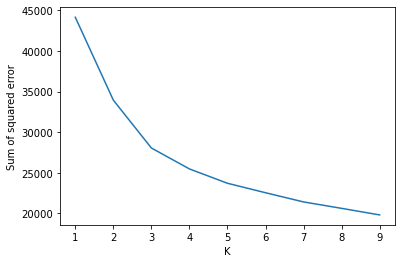

In [15]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

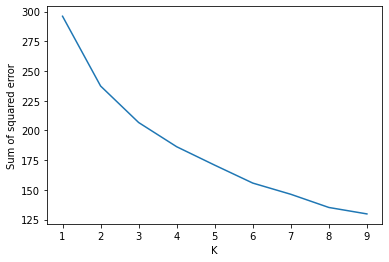

In [16]:
k_rng_2 = range(1, 10)
sse_2 = []
for k in k_rng_2:
    km_2 = KMeans(n_clusters=k)
    km_2.fit(x_train_02)
    sse_2.append(km_2.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng_2, sse_2)

In [17]:
sse_2

[296.1152416791723,
 237.38060616302917,
 206.6601901565966,
 186.27337639618645,
 170.763601246813,
 155.67748330885323,
 146.24305985955812,
 135.1457943052179,
 129.72041539516144]

In [18]:
x_train_01

0         1         2         3         4         5         6  \
0      0.860892  0.610048  0.000000  0.069252  0.324138  0.066667  0.194690   
1      0.427822  0.583732  0.000000  0.094183  0.317241  1.000000  0.442478   
2      0.456693  0.509569  0.000000  0.119114  0.937931  0.133333  0.176991   
3      0.364829  0.385167  0.000000  0.055402  0.620690  0.600000  0.513274   
4      0.645669  0.473684  0.001940  0.055402  0.737931  0.733333  0.362832   
...         ...       ...       ...       ...       ...       ...       ...   
45131  0.461942  0.464115  0.000000  0.058172  0.779310  0.066667  0.115044   
45132  0.396325  0.289474  0.000000  0.038781  0.482759  0.133333  0.194690   
45133  0.606299  0.442584  0.000000  0.077562  0.662069  0.133333  0.265487   
45134  0.482940  0.246411  0.017459  0.055402  0.365517  0.733333  0.707965   
45135  0.682415  0.485646  0.000000  0.074792  0.365517  0.466667  0.230088   

              7         8         9        10    11    12        13        14  \
0      0.133333  0.066667  0.230769  0.121622  0.68  0.63  0.532554  0.496764   
1      1.000000  1.000000  0.230769  0.500000  0.48  0.21  0.507513  0.493528   
2      0.133333  0.000000  0.169231  0.121622  0.46  0.16  0.619366  0.629450   
3      1.000000  0.800000  0.076923  0.391892  0.57  0.48  0.562604  0.563107   
4      0.733333  0.666667  0.230769  0.175676  0.40  0.32  0.537563  0.550162   
...         ...       ...       ...       ...   ...   ...       ...       ...   
45131  0.200000  0.000000  0.107692  0.121622  0.64  0.37  0.751252  0.716828   
45132  0.066667  1.000000  0.200000  0.202703  0.65  0.42  0.654424  0.616505   
45133  0.933333  0.066667  0.107692  0.351351  0.62  0.57  0.764608  0.734628   
45134  0.666667  0.533333  0.446154  0.148649  0.46  0.46  0.437396  0.535599   
45135  0.133333  0.666667  0.030769  0.229730  0.68  0.51  0.562604  0.580906   

          15        16        17        18   19  
0      0.875  0.777778  0.738155  0.605263  0.0  
1      0.875  0.777778  0.518703  0.593301  0.0  
2      0.125  0.111111  0.461347  0.511962  0.0  
3      0.375  0.444444  0.418953  0.397129  0.0  
4      0.250  0.111111  0.551122  0.511962  0.0  
...      ...       ...       ...       ...  ...  
45131  0.000  0.000000  0.438903  0.495215  0.0  
45132  0.500  0.333333  0.289277  0.325359  0.0  
45133  0.500  0.111111  0.548628  0.466507  0.0  
45134  0.750  0.777778  0.356608  0.236842  1.0  
45135  0.875  0.777778  0.523691  0.516746  0.0  

[45136 rows x 20 columns]

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.18589536087594027
For n_clusters = 3 The average silhouette_score is : 0.18212322408407874
For n_clusters = 4 The average silhouette_score is : 0.18855790745177758
For n_clusters = 5 The average silhouette_score is : 0.18795976860828126
For n_clusters = 6 The average silhouette_score is : 0.18710078077501432


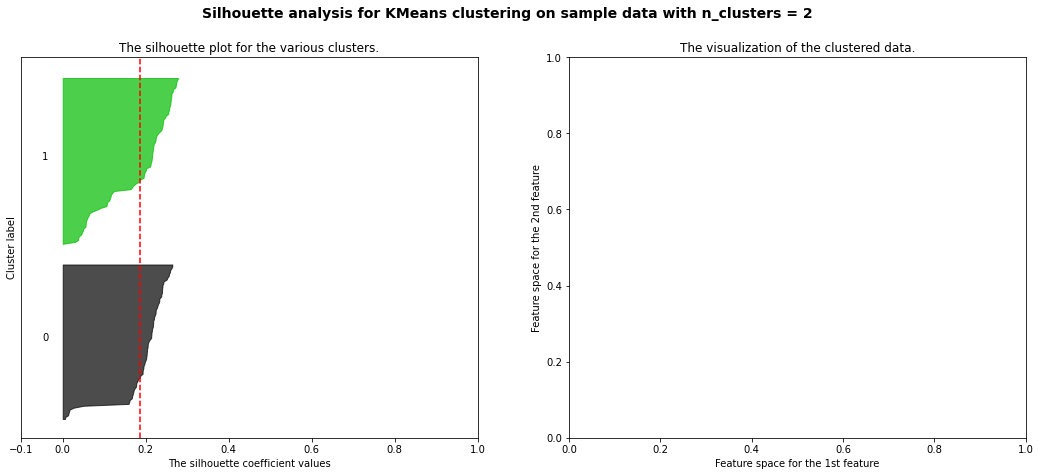

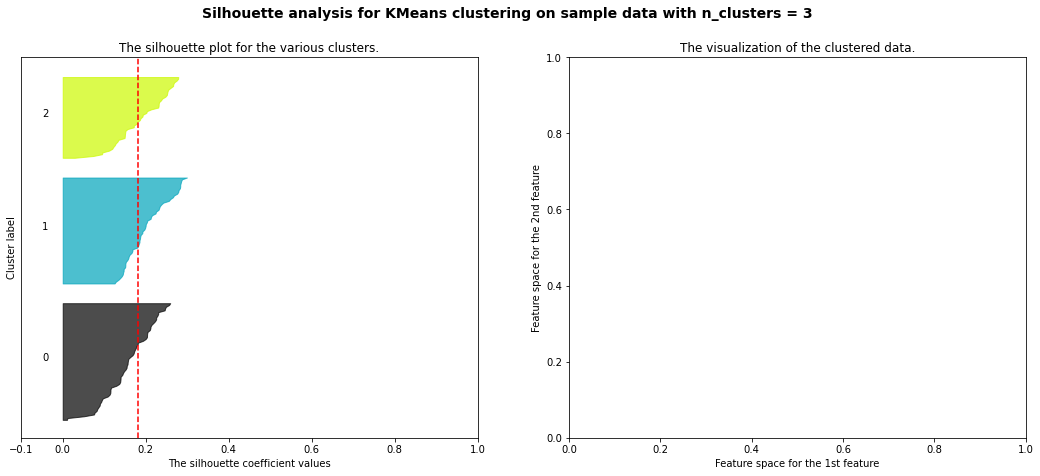

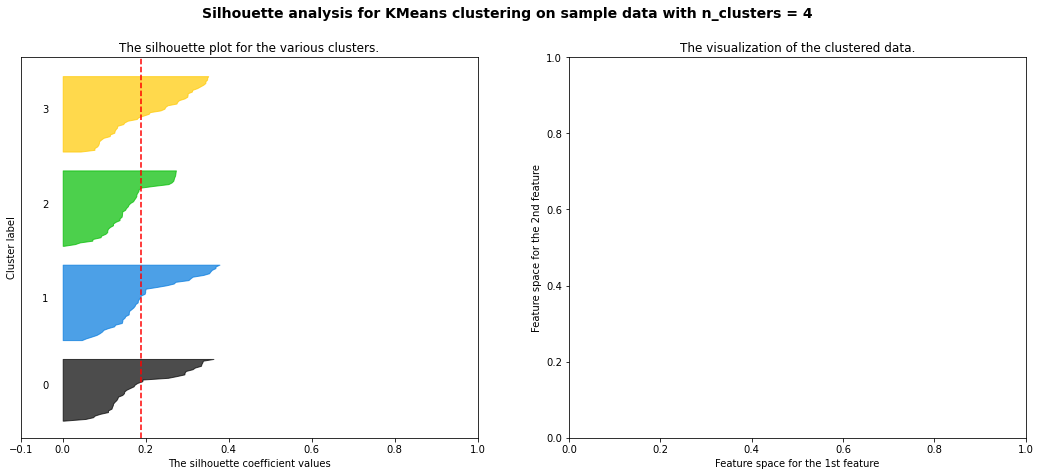

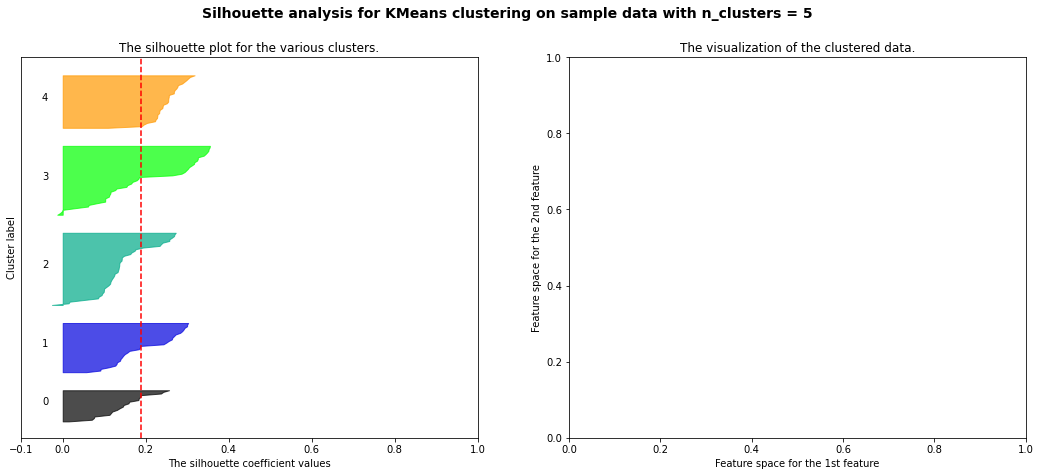

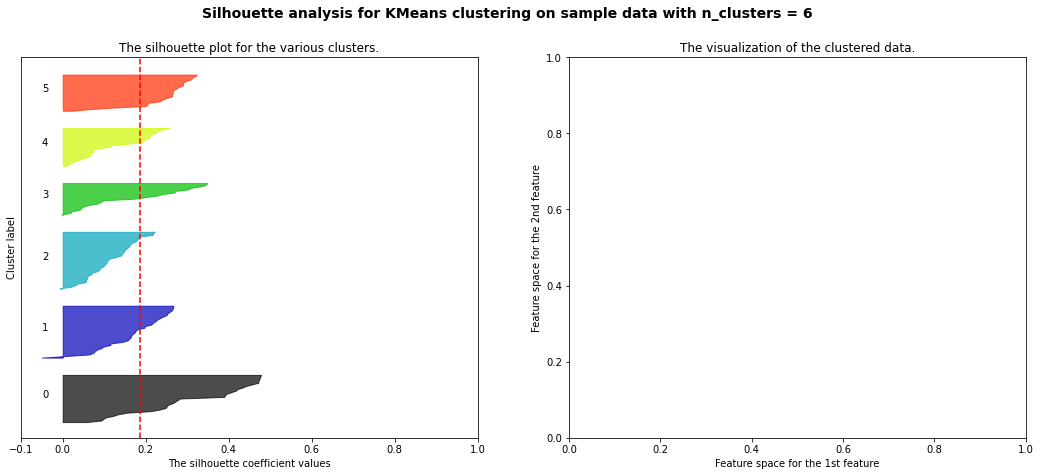

In [19]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = x_train_02, y_train_02
# For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
#                 c=colors, edgecolor='k')

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.2147454584608705
For n_clusters = 3 The average silhouette_score is : 0.21935104362223212
For n_clusters = 4 The average silhouette_score is : 0.19332489673913636
For n_clusters = 5 The average silhouette_score is : 0.17109910846432477
For n_clusters = 6 The average silhouette_score is : 0.15925937961039394


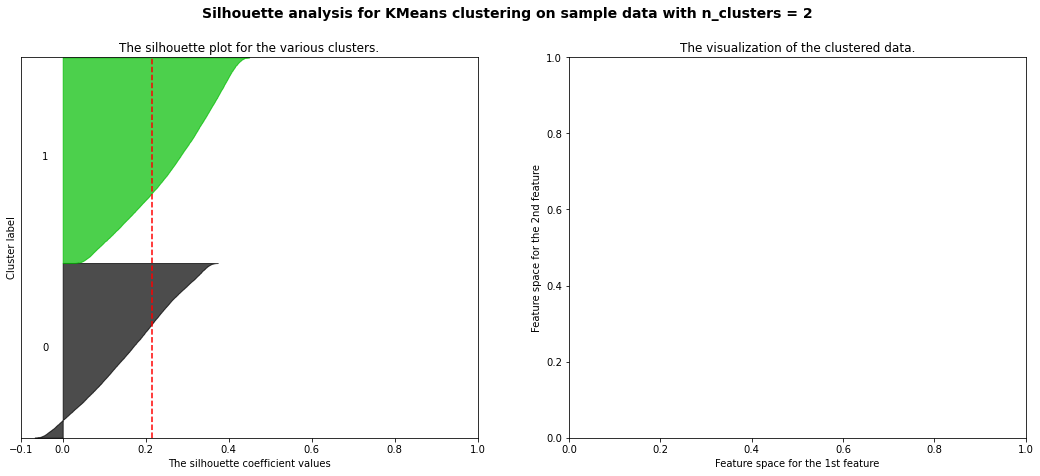

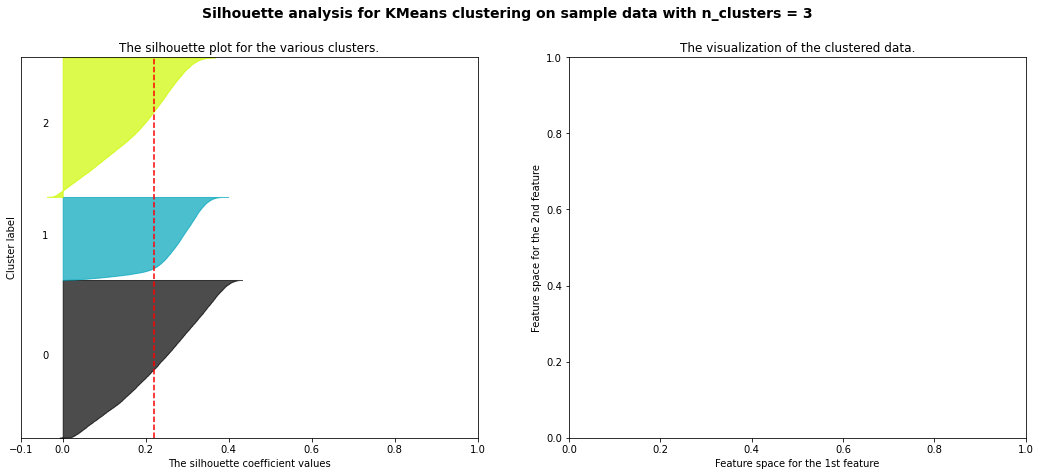

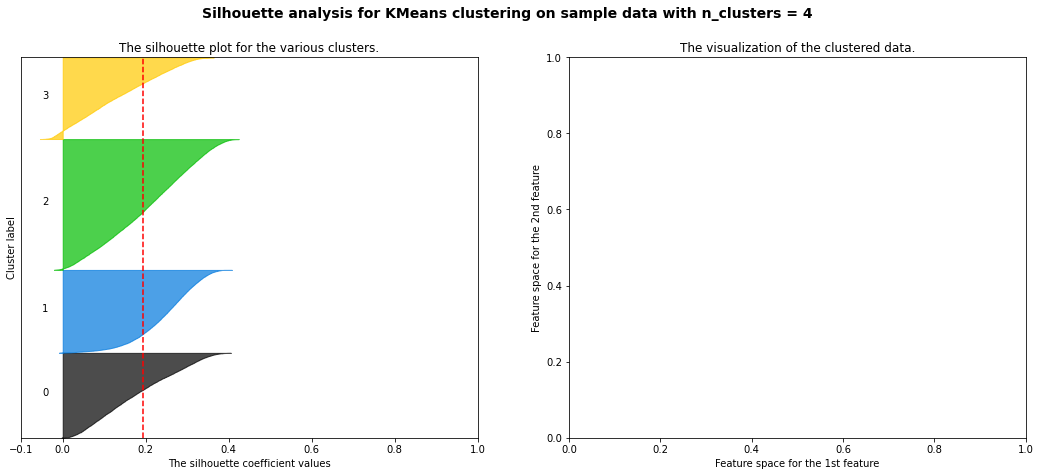

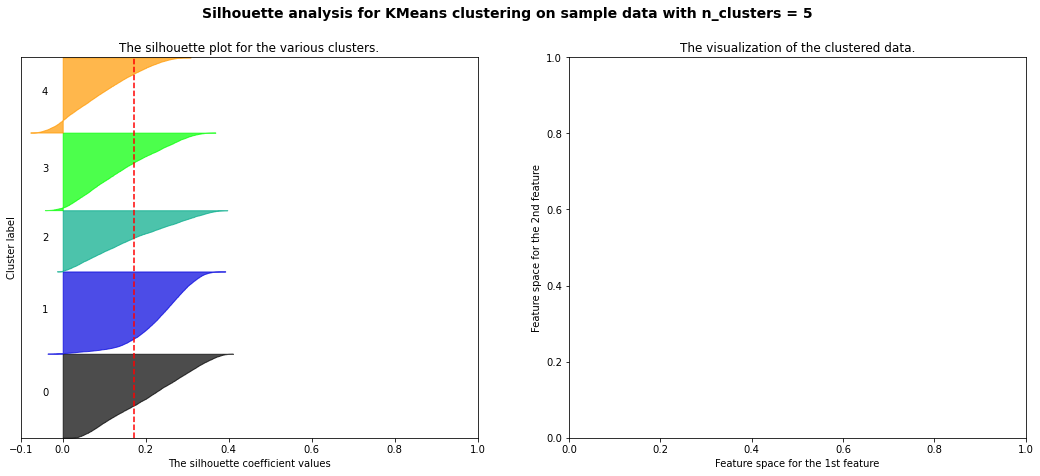

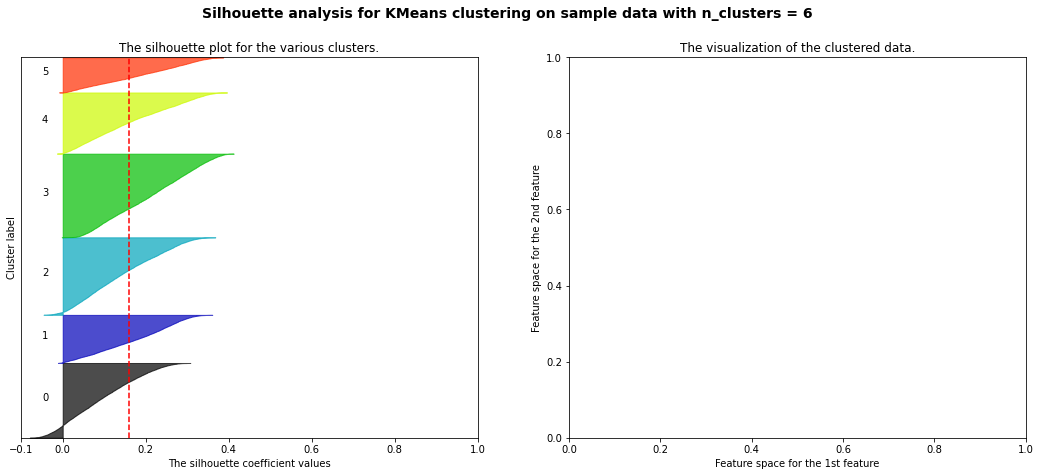

In [20]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = x_train_01, y_train_01
# For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
#                 c=colors, edgecolor='k')

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [21]:
from scipy.stats import norm, kurtosis
kurtosis(x_train_02)


array([-1.4026418 , -0.57871523, -1.96508456,  0.43508781, -1.69185962,
       -1.89511574,  0.09408703, -0.06742187, -1.74636952, -1.15925239,
       -1.94517544, -0.51545905])

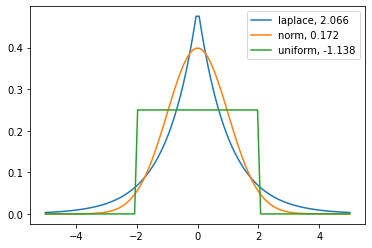

In [22]:
# import matplotlib.pyplot as plt
# import scipy.stats as stats
# from scipy.stats import kurtosis

x = np.linspace(-5, 5, 100)
ax = plt.subplot()
distnames = ['laplace', 'norm', 'uniform']

for distname in distnames:
    if distname == 'uniform':
        dist = getattr(stats, distname)(loc=-2, scale=4)
    else:
        dist = getattr(stats, distname)
    data = dist.rvs(size=1000)
    kur = kurtosis(data, fisher=True)
    y = dist.pdf(x)
    ax.plot(x, y, label="{}, {}".format(distname, round(kur, 3)))
    ax.legend()

In [23]:
clusters=3
kmeans_01 = KMeans(init="k-means++", n_clusters=clusters, n_init=40, max_iter=1000)
kmeans_01.fit(x_train_01)
kmeans_01.labels_
clusters=4
kmeans_02 = KMeans(init="k-means++", n_clusters=clusters, n_init=40, max_iter=1000)
kmeans_02.fit(x_train_02)


KMeans(max_iter=1000, n_clusters=4, n_init=40)

In [27]:
# from sklearn.metrics.cluster import homogeneity_score
print("%.6f" % homogeneity_score(y_train_01, kmeans_01.labels_))

0.152396


In [28]:
print("%.6f" % homogeneity_score(y_train_02, kmeans_02.labels_))

0.053601


In [29]:
print("%.6f" % metrics.completeness_score(y_train_01, kmeans_01.labels_))

0.075455


In [30]:
print("%.6f" % metrics.completeness_score(y_train_02, kmeans_02.labels_))

0.024139


In [45]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [61]:
n_clusters=np.arange(2, 20)
sils1=[]
sils_err1=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GMM(n, n_init=2).fit(x_train_01) 
        labels=gmm.predict(x_train_01)
        sil=metrics.silhouette_score(x_train_01, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils1.append(val)
    sils_err1.append(err)

Text(0, 0.5, 'Score')

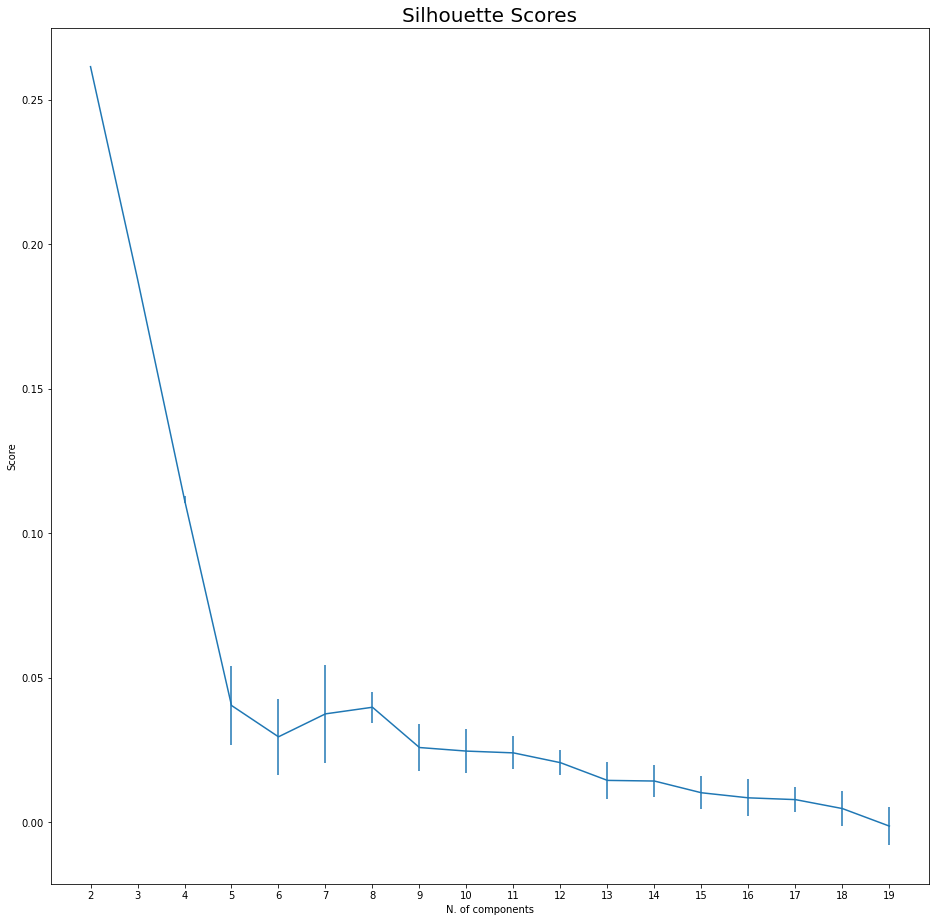

In [86]:
def cm_to_inch(value):
    return value/2.54
plt.figure(figsize=(cm_to_inch(40),cm_to_inch(40)))
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of components")
plt.ylabel("Score")

In [53]:
n_clusters=np.arange(2, 60)
sils2=[]
sils_err2=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GMM(n, n_init=2).fit(x_train_02) 
        labels=gmm.predict(x_train_02)
        sil=metrics.silhouette_score(x_train_02, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils2.append(val)
    sils_err2.append(err)

Text(0, 0.5, 'Score')

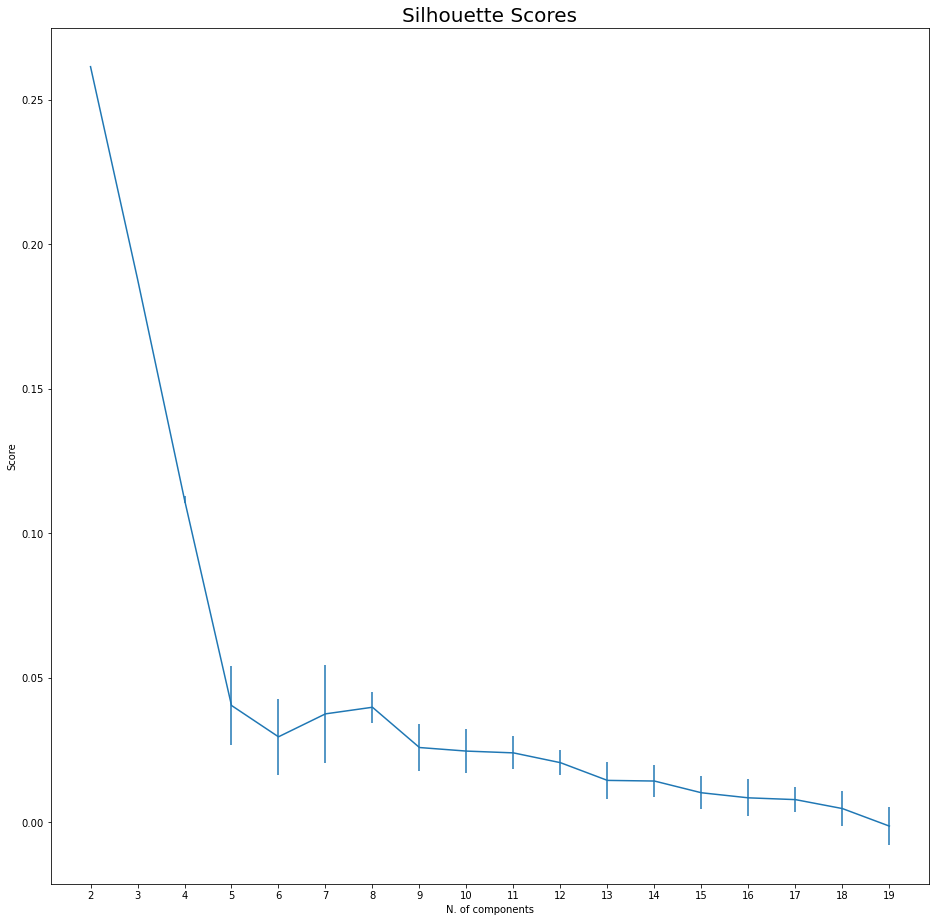

In [85]:
def cm_to_inch(value):
    return value/2.54
plt.figure(figsize=(cm_to_inch(40),cm_to_inch(40)))
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of components")
plt.ylabel("Score")


In [80]:
clusters=2
em_01 = GMM(clusters, n_init=2) 
em_01.fit(x_train_01)
labels_01 = em_01.predict(x_train_01)
# em_01.labels_
clusters=44
em_02 = GMM(clusters, n_init=2) 
em_02.fit(x_train_02)
labels_02 = em_02.predict(x_train_02)
# em_02.labels_

In [42]:
adjusted_rand_score(y_train_01, labels_01)

NameError: name 'labels_01' is not defined

In [41]:
adjusted_rand_score(y_train_02, labels_02)

NameError: name 'adjusted_rand_score' is not defined

In [108]:
get_homo_comp_scores(y_train_01, labels_01)

homogeneity_score : 0.082007
completeness_score: 0.081959


In [109]:
get_homo_comp_scores(y_train_02, labels_02)

homogeneity_score : 0.335338
completeness_score: 0.056795


In [104]:

def getBIC(X):
    lowest_bic = np.infty
    bic = []
    n_components_range = range(5, 15)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(X)
            bic.append(gmm.bic(X))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm

    bic = np.array(bic)
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                                  'darkorange'])
    clf = best_gmm
    bars = []

    # Plot the BIC scores
    plt.figure(figsize=(8, 6))
    spl = plt.subplot(2, 1, 1)
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + .2 * (i - 2)
        bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                      (i + 1) * len(n_components_range)],
                            width=.2, color=color))
    plt.xticks(n_components_range)
    plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
    plt.title('BIC score per model')
    xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
        .2 * np.floor(bic.argmin() / len(n_components_range))
    plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
    spl.set_xlabel('Number of components')
    spl.legend([b[0] for b in bars], cv_types)

    # Plot the winner
    splot = plt.subplot(2, 1, 2)
    Y_ = clf.predict(X)
    # print(clf.covariances_)
    for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                               color_iter)):
        v, w = linalg.eigh(cov)
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan2(w[0][1], w[0][0])
        angle = 180. * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.title(f'Selected GMM: {best_gmm.covariance_type} model, '
              f'{best_gmm.n_components} components')
    plt.subplots_adjust(hspace=.35, bottom=.02)
    plt.show()

TypeError: '(array([ True, False, False, ..., False, False, False]), 0)' is an invalid key

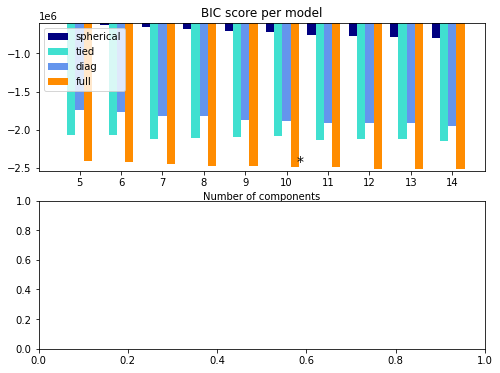

In [105]:
getBIC(X = x_train_01)

ValueError: expected square "a" matrix

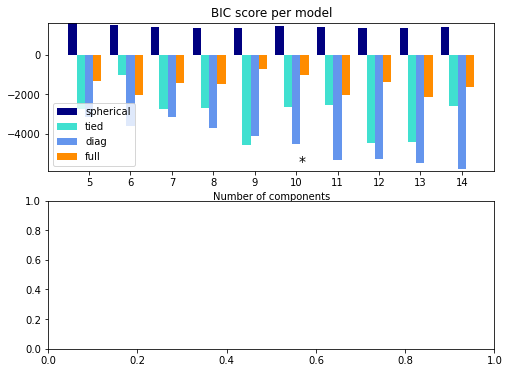

In [106]:
getBIC(X = x_train_02)

In [71]:
gmm_01 = mixture.GaussianMixture(n_components=10,
                                    covariance_type="full")
# gmm_01.fit(x_train_01)


gmm_labels_01 = gmm_01.fit_predict(x_train_01)


In [72]:
gmm_02 = mixture.GaussianMixture(n_components=10,
                                    covariance_type="full")
# gmm_02.fit(x_train_02)


gmm_labels_02 = gmm_02.fit_predict(x_train_02)

In [73]:
print('DataSet 01: ',adjusted_rand_score(y_train_01, gmm_labels_01))
print('DataSet 02: ',adjusted_rand_score(y_train_02, gmm_labels_02))
get_homo_comp_scores(y_train_01, gmm_labels_01)
get_homo_comp_scores(y_train_02, gmm_labels_02)

DataSet 01:  0.029842171491065474
DataSet 02:  0.007139247217912848
homogeneity_score : 0.189072
completeness_score: 0.044397
homogeneity_score : 0.070798
completeness_score: 0.019412


In [127]:
def runPCA(X) :
    pca = PCA().fit(X)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    print(np.cumsum(pca.explained_variance_ratio_))



[0.32550244 0.49593753 0.62595643 0.72820521 0.80219172 0.84355097
 0.87912109 0.91405104 0.94098548 0.95919464 0.97261386 0.98303964
 0.99011301 0.99374588 0.99653637 0.99781919 0.99861964 0.9993782
 0.99974631 1.        ]


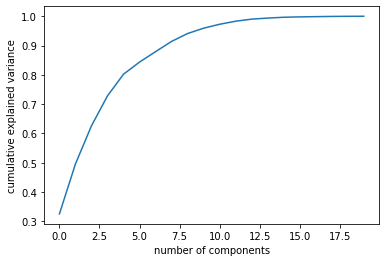

In [128]:
runPCA(x_train_01)


[0.23369332 0.41410994 0.57684626 0.70905503 0.80779154 0.86206194
 0.91312789 0.9494232  0.96735271 0.98471386 0.99295604 1.        ]


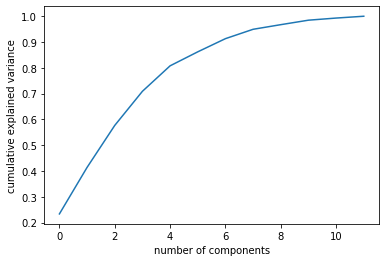

In [129]:
runPCA(x_train_02)

In [130]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x_train_01)
pca.explained_variance_ratio_

array([0.32550244, 0.17043509, 0.1300189 , 0.10224878, 0.07398651,
       0.04135924, 0.03557012, 0.03492996])

In [131]:
sum(pca.explained_variance_ratio_)

0.9140510443621895

In [156]:
def plotPCAPairs(component1, component2, data):
    plt.scatter(component1, component2,
    c=data, edgecolor='none', alpha=0.5,
    cmap=plt.cm.get_cmap('Spectral', 2))
    plt.xlabel('Principal component 1')
    plt.ylabel('Pricipal component 2')
    plt.colorbar()

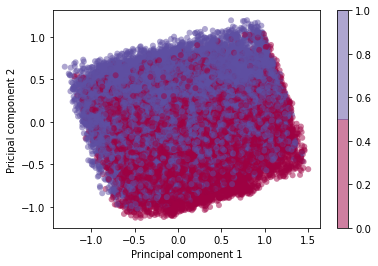

In [157]:
plotPCAPairs(principalComponents[:, 0], principalComponents[:, 1], x_train_01[0])

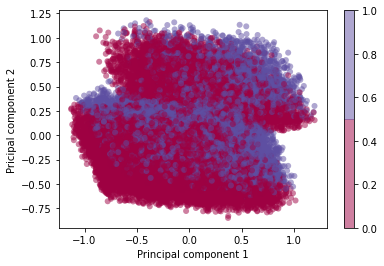

In [152]:
plotPCAPairs(principalComponents[:, 1], principalComponents[:, 2], x_train_01[1])

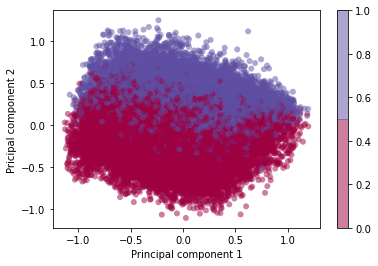

In [153]:
plotPCAPairs(principalComponents[:, 1], principalComponents[:, 3], x_train_01[1])

In [165]:
tsne = TSNE()
tsne_results = tsne.fit_transform(principalComponents)

In [184]:
tsne.n_iter_

999

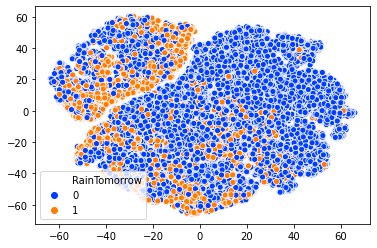

In [182]:
palette = sns.color_palette("bright", 2)
sns.scatterplot(tsne_results[:,0], tsne_results[:,1], hue=y_train_01, legend='full', palette=palette)

In [186]:
tsne2 = TSNE(n_jobs=-1, n_iter=3000, verbose=3)
tsne_results2 = tsne2.fit_transform(principalComponents)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 45136 samples in 0.031s...
[t-SNE] Computed neighbors for 45136 samples in 3.149s...
[t-SNE] Computed conditional probabilities for sample 1000 / 45136
[t-SNE] Computed conditional probabilities for sample 2000 / 45136
[t-SNE] Computed conditional probabilities for sample 3000 / 45136
[t-SNE] Computed conditional probabilities for sample 4000 / 45136
[t-SNE] Computed conditional probabilities for sample 5000 / 45136
[t-SNE] Computed conditional probabilities for sample 6000 / 45136
[t-SNE] Computed conditional probabilities for sample 7000 / 45136
[t-SNE] Computed conditional probabilities for sample 8000 / 45136
[t-SNE] Computed conditional probabilities for sample 9000 / 45136
[t-SNE] Computed conditional probabilities for sample 10000 / 45136
[t-SNE] Computed conditional probabilities for sample 11000 / 45136
[t-SNE] Computed conditional probabilities for sample 12000 / 45136
[t-SNE] Computed conditional probabilities for sam

[t-SNE] Iteration 2550: error = 2.2465966, gradient norm = 0.0000201 (50 iterations in 11.602s)
[t-SNE] Iteration 2600: error = 2.2435324, gradient norm = 0.0000198 (50 iterations in 12.087s)
[t-SNE] Iteration 2650: error = 2.2406592, gradient norm = 0.0000197 (50 iterations in 12.360s)
[t-SNE] Iteration 2700: error = 2.2379355, gradient norm = 0.0000197 (50 iterations in 12.696s)
[t-SNE] Iteration 2750: error = 2.2354569, gradient norm = 0.0000191 (50 iterations in 15.277s)
[t-SNE] Iteration 2800: error = 2.2330666, gradient norm = 0.0000190 (50 iterations in 14.456s)
[t-SNE] Iteration 2850: error = 2.2308168, gradient norm = 0.0000188 (50 iterations in 12.742s)
[t-SNE] Iteration 2900: error = 2.2286537, gradient norm = 0.0000184 (50 iterations in 11.906s)
[t-SNE] Iteration 2950: error = 2.2265875, gradient norm = 0.0000184 (50 iterations in 11.487s)
[t-SNE] Iteration 3000: error = 2.2245896, gradient norm = 0.0000182 (50 iterations in 11.917s)
[t-SNE] KL divergence after 3000 iterati

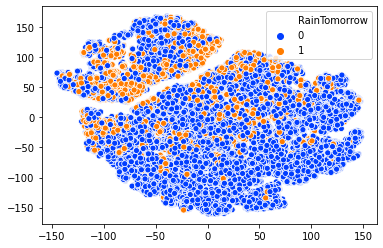

In [187]:
sns.scatterplot(tsne_results2[:,0], tsne_results2[:,1], hue=y_train_01, legend='full', palette=palette)

In [188]:
pca2 = PCA(n_components=7)
principalComponents2 = pca2.fit_transform(x_train_02)
pca2.explained_variance_ratio_

array([0.23369332, 0.18041662, 0.16273632, 0.13220877, 0.09873652,
       0.05427039, 0.05106595])

In [201]:
tsne3 = TSNE(n_jobs=-1, n_iter=3000, verbose=3)
tsne_results3 = tsne3.fit_transform(principalComponents2)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 172 samples in 0.000s...
[t-SNE] Computed neighbors for 172 samples in 0.011s...
[t-SNE] Computed conditional probabilities for sample 172 / 172
[t-SNE] Mean sigma: 0.742005
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 60.9814796, gradient norm = 0.5166391 (50 iterations in 0.046s)
[t-SNE] Iteration 100: error = 60.3503456, gradient norm = 0.5559113 (50 iterations in 0.035s)
[t-SNE] Iteration 150: error = 60.0746765, gradient norm = 0.5261884 (50 iterations in 0.025s)
[t-SNE] Iteration 200: error = 59.3366165, gradient norm = 0.5441608 (50 iterations in 0.034s)
[t-SNE] Iteration 250: error = 61.0264282, gradient norm = 0.4935199 (50 iterations in 0.030s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.026428
[t-SNE] Iteration 300: error = 0.8913025, gradient norm = 0.0045974 (50 iterations in 0.031s)
[t-SNE] Iteration 350: error = 0.5949413, gradient norm = 0.0067596 (

In [202]:
tsne3.n_iter_

1449

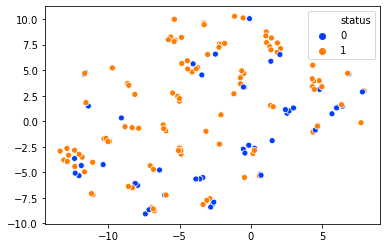

In [204]:
palette = sns.color_palette("bright", 2)

sns.scatterplot(tsne_results3[:,0], tsne_results3[:,1], hue=y_train_02, legend='full', palette=palette)

In [206]:
tsne3d = TSNE(n_components=3)
tsne_results3d = tsne3d.fit_transform(principalComponents2)
palette3d = sns.color_palette("bright", 3)



In [207]:
tsne_results3d

array([[-9.29306793e+00, -1.16637772e+02,  3.65732193e+01],
       [ 5.93944130e+01,  6.54958248e+00, -1.03164734e+02],
       [-2.74706268e+00,  2.36180611e+01,  8.69976234e+00],
       [-1.17453033e+02,  6.23282585e+01,  4.90814972e+01],
       [ 5.44888191e+01,  5.31596260e+01, -1.12770485e+02],
       [ 3.24572144e+01, -1.09311569e+02,  9.34958649e+01],
       [ 2.98427563e+01, -1.43560982e+01,  4.69618797e+00],
       [ 1.36333914e+01,  1.58513321e+02, -1.62543430e+01],
       [ 9.26740799e+01,  1.16385887e+02, -8.75572968e+01],
       [-3.63161888e+01, -1.25331390e+02, -6.66576233e+01],
       [ 7.08698120e+01, -1.28564133e+02,  6.33072472e+01],
       [-6.30843887e+01,  7.04345169e+01,  6.42673569e+01],
       [-2.04998531e+01, -6.29176636e+01,  1.40912598e+02],
       [ 5.70434418e+01,  2.06238136e+01, -1.02699976e+01],
       [ 1.23538265e+01, -1.05181038e+02, -2.19220371e+01],
       [-4.38392792e+01, -1.18890181e+01,  3.42540970e+01],
       [-8.82916183e+01,  1.35641068e+02

In [212]:
# sns.scatterplot(tsne_results3d[:,0], tsne_results3d[:,1], hue=y_train_02, legend='full', palette=palette3d)
def runICA(X) :
    pca = FastICA().fit(X)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    print(np.cumsum(pca.explained_variance_ratio_))

In [268]:
avg_kurtosis={}
for components in range(1, 21):
    ica = FastICA(n_components=components)
    S_ = ica.fit_transform(x_train_01)
    avg_kurtosis[components] = np.mean(kurtosis(ica.components_, fisher=False))

In [269]:
avg_kurtosis

{1: 0.0,
 2: 1.0,
 3: 1.5,
 4: 2.1645270118664923,
 5: 2.4799255025383524,
 6: 2.5715996546813753,
 7: 2.4180830146860584,
 8: 3.0185667014513036,
 9: 3.71408815305569,
 10: 3.9045678315946595,
 11: 4.004755988329543,
 12: 4.404908348974056,
 13: 4.81361846651039,
 14: 5.8040725294689235,
 15: 5.893310541642962,
 16: 7.295819885090998,
 17: 7.753189999295915,
 18: 8.276928980924952,
 19: 8.594989883063475,
 20: 10.158727632285423}

In [286]:
ica = FastICA(n_components=20, random_state=40)
S_ = ica.fit_transform(x_train_01)
kurtosis(ica.components_, fisher=False)
#2,3,4,5,7,8,9,13,19,20

array([ 7.27811967, 12.50901375, 15.2373352 , 16.50262705, 12.4461601 ,
        7.97120281, 16.22418132,  9.3065959 , 12.35959409,  4.66925565,
        8.16489032,  5.68984052, 14.09353914,  7.30082089,  8.37911703,
        8.41876955, 10.07045706,  4.2107557 ,  9.21521369,  9.44517849])

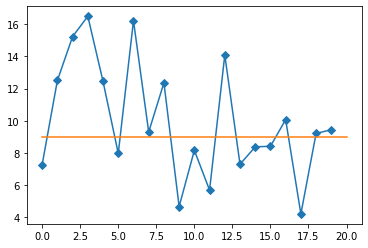

In [299]:
plt.plot(kurtosis(ica.components_, fisher=False),  marker='D')
plt.plot([0,20], [9, 9])
plt.show()
          

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 45136 samples in 0.064s...
[t-SNE] Computed neighbors for 45136 samples in 30.720s...
[t-SNE] Computed conditional probabilities for sample 1000 / 45136
[t-SNE] Computed conditional probabilities for sample 2000 / 45136
[t-SNE] Computed conditional probabilities for sample 3000 / 45136
[t-SNE] Computed conditional probabilities for sample 4000 / 45136
[t-SNE] Computed conditional probabilities for sample 5000 / 45136
[t-SNE] Computed conditional probabilities for sample 6000 / 45136
[t-SNE] Computed conditional probabilities for sample 7000 / 45136
[t-SNE] Computed conditional probabilities for sample 8000 / 45136
[t-SNE] Computed conditional probabilities for sample 9000 / 45136
[t-SNE] Computed conditional probabilities for sample 10000 / 45136
[t-SNE] Computed conditional probabilities for sample 11000 / 45136
[t-SNE] Computed conditional probabilities for sample 12000 / 45136
[t-SNE] Computed conditional probabilities for sa

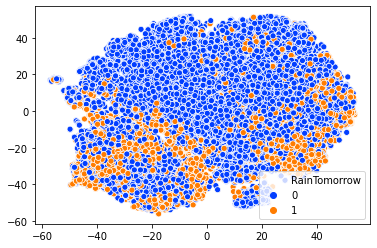

In [300]:
tsneICAPre = TSNE(n_jobs=-1, n_iter=1000, verbose=3)
tsne_resultstsneICAPre = tsneICAPre.fit_transform(S_)
palette = sns.color_palette("bright", 2)

sns.scatterplot(tsne_resultstsneICAPre[:,0], tsne_resultstsneICAPre[:,1], hue=y_train_01, legend='full', palette=palette)

In [279]:
x_train_01[[1,2,3,4,6,7,8,12,16,18,19]]

1         2         3         4         6         7         8   \
0      0.610048  0.000000  0.069252  0.324138  0.194690  0.133333  0.066667   
1      0.583732  0.000000  0.094183  0.317241  0.442478  1.000000  1.000000   
2      0.509569  0.000000  0.119114  0.937931  0.176991  0.133333  0.000000   
3      0.385167  0.000000  0.055402  0.620690  0.513274  1.000000  0.800000   
4      0.473684  0.001940  0.055402  0.737931  0.362832  0.733333  0.666667   
...         ...       ...       ...       ...       ...       ...       ...   
45131  0.464115  0.000000  0.058172  0.779310  0.115044  0.200000  0.000000   
45132  0.289474  0.000000  0.038781  0.482759  0.194690  0.066667  1.000000   
45133  0.442584  0.000000  0.077562  0.662069  0.265487  0.933333  0.066667   
45134  0.246411  0.017459  0.055402  0.365517  0.707965  0.666667  0.533333   
45135  0.485646  0.000000  0.074792  0.365517  0.230088  0.133333  0.666667   

         12        18   19  
0      0.63  0.605263  0.0  
1      0.21  0.593301  0.0  
2      0.16  0.511962  0.0  
3      0.48  0.397129  0.0  
4      0.32  0.511962  0.0  
...     ...       ...  ...  
45131  0.37  0.495215  0.0  
45132  0.42  0.325359  0.0  
45133  0.57  0.466507  0.0  
45134  0.46  0.236842  1.0  
45135  0.51  0.516746  0.0  

[45136 rows x 10 columns]

In [301]:
ica = FastICA(n_components=11, random_state=40)
S_ = ica.fit_transform(x_train_01[[1,2,3,4,6,7,8,12,16,18,19]])
kurtosis(ica.components_, fisher=False)
#2,3,4,5,7,8,9,13,19,20

array([7.23859006, 7.14238196, 8.68642034, 3.46056798, 7.59935942,
       3.73519533, 4.52676505, 7.78092205, 4.53142746, 7.22787578,
       4.50752266])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 45136 samples in 0.090s...
[t-SNE] Computed neighbors for 45136 samples in 32.686s...
[t-SNE] Computed conditional probabilities for sample 1000 / 45136
[t-SNE] Computed conditional probabilities for sample 2000 / 45136
[t-SNE] Computed conditional probabilities for sample 3000 / 45136
[t-SNE] Computed conditional probabilities for sample 4000 / 45136
[t-SNE] Computed conditional probabilities for sample 5000 / 45136
[t-SNE] Computed conditional probabilities for sample 6000 / 45136
[t-SNE] Computed conditional probabilities for sample 7000 / 45136
[t-SNE] Computed conditional probabilities for sample 8000 / 45136
[t-SNE] Computed conditional probabilities for sample 9000 / 45136
[t-SNE] Computed conditional probabilities for sample 10000 / 45136
[t-SNE] Computed conditional probabilities for sample 11000 / 45136
[t-SNE] Computed conditional probabilities for sample 12000 / 45136
[t-SNE] Computed conditional probabilities for sa

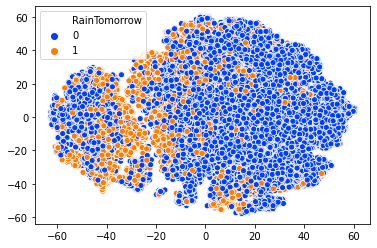

In [302]:
tsneICAPost = TSNE(n_jobs=-1, n_iter=1000, verbose=3, random_state=40)
tsne_resultstsneICAPost = tsneICAPost.fit_transform(S_)
palette = sns.color_palette("bright", 2)

sns.scatterplot(tsne_resultstsneICAPost[:,0], tsne_resultstsneICAPost[:,1], hue=y_train_01, legend='full', palette=palette)

In [303]:
avg_kurtosis={}
for components in range(1, 13):
    ica = FastICA(n_components=components)
    S_ = ica.fit_transform(x_train_02)
    avg_kurtosis[components] = np.mean(kurtosis(ica.components_, fisher=False))

/Users/mandads/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


In [304]:
avg_kurtosis

{1: 0.0,
 2: 1.0,
 3: 1.5,
 4: 1.9807433625013395,
 5: 2.7847023887480398,
 6: 3.188179192386221,
 7: 4.067488323030763,
 8: 4.9617900524477205,
 9: 4.937135825561608,
 10: 4.46352469004495,
 11: 5.420066549019418,
 12: 4.514931896129312}

In [308]:
ica = FastICA(n_components=11, random_state=40)
S_ = ica.fit_transform(x_train_02)
kurtosis(ica.components_, fisher=False)
#2,3,4,5,7,8,9,13,19,20

/Users/mandads/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


array([4.83438334, 5.71694882, 4.42536703, 3.77603819, 4.64449165,
       4.95228359, 3.59417606, 6.17293643, 7.9642312 , 6.08323726,
       7.87191632, 3.76331473])

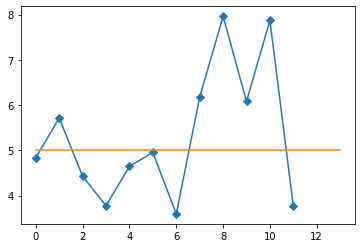

In [309]:
plt.plot(kurtosis(ica.components_, fisher=False),  marker='D')
plt.plot([0,13], [5, 5])
plt.show()
          

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 172 samples in 0.000s...
[t-SNE] Computed neighbors for 172 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 172 / 172
[t-SNE] Mean sigma: 0.133054
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 60.9729767, gradient norm = 0.5299590 (50 iterations in 0.049s)
[t-SNE] Iteration 100: error = 61.0675659, gradient norm = 0.5322960 (50 iterations in 0.049s)
[t-SNE] Iteration 150: error = 60.9659920, gradient norm = 0.5171176 (50 iterations in 0.050s)
[t-SNE] Iteration 200: error = 61.0858841, gradient norm = 0.4845068 (50 iterations in 0.047s)
[t-SNE] Iteration 250: error = 61.1963196, gradient norm = 0.5636802 (50 iterations in 0.049s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.196320
[t-SNE] Iteration 300: error = 1.0562937, gradient norm = 0.0034148 (50 iterations in 0.044s)
[t-SNE] Iteration 350: error = 0.9059145, gradient norm = 0.0044838 (

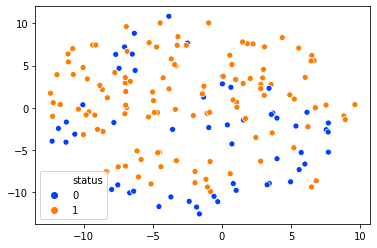

In [311]:
tsneICAPre = TSNE(n_jobs=-1, n_iter=1000, verbose=3,random_state=40)
tsne_resultstsneICAPre = tsneICAPre.fit_transform(S_)
palette = sns.color_palette("bright", 2)

sns.scatterplot(tsne_resultstsneICAPre[:,0], tsne_resultstsneICAPre[:,1], hue=y_train_02, legend='full', palette=palette)

In [313]:
x_train_02[[1,7,8,9,10]]

1    7    8         9    10
0    0.600082  0.5  0.0  0.696203  0.0
1    0.303236  0.5  0.0  0.160970  1.0
2    0.393115  1.0  0.0  0.094515  1.0
3    0.701093  0.0  1.0  0.632911  0.0
4    0.455782  0.5  0.0  0.379747  1.0
..        ...  ...  ...       ...  ...
167  0.909297  0.5  0.0  0.886076  0.0
168  0.600082  1.0  1.0  0.105485  0.0
169  0.435168  0.5  1.0  0.274262  1.0
170  0.950526  1.0  1.0  0.527426  1.0
171  0.641311  1.0  1.0  0.590717  0.0

[172 rows x 5 columns]

In [314]:
ica = FastICA(n_components=5,random_state=40)
S_ = ica.fit_transform(x_train_02[[1,7,8,9,10]])
kurtosis(ica.components_, fisher=False)
#2,3,4,5,7,8,9,13,19,20

array([3.17031546, 2.96130769, 3.01796679, 3.19850883, 3.01367896])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 172 samples in 0.000s...
[t-SNE] Computed neighbors for 172 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 172 / 172
[t-SNE] Mean sigma: 0.094869
[t-SNE] Computed conditional probabilities in 0.008s
[t-SNE] Iteration 50: error = 60.3236618, gradient norm = 0.5392138 (50 iterations in 0.051s)
[t-SNE] Iteration 100: error = 60.2180710, gradient norm = 0.4830499 (50 iterations in 0.044s)
[t-SNE] Iteration 150: error = 58.9381790, gradient norm = 0.5897062 (50 iterations in 0.038s)
[t-SNE] Iteration 200: error = 59.4857178, gradient norm = 0.5274368 (50 iterations in 0.023s)
[t-SNE] Iteration 250: error = 60.1713638, gradient norm = 0.5140295 (50 iterations in 0.023s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.171364
[t-SNE] Iteration 300: error = 0.5684932, gradient norm = 0.0095847 (50 iterations in 0.041s)
[t-SNE] Iteration 350: error = 0.3278420, gradient norm = 0.0023463 (

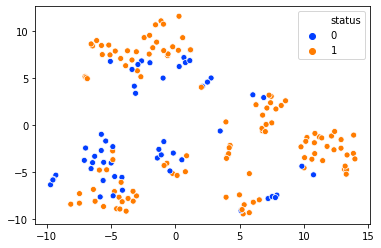

In [315]:
tsneICAPost = TSNE(n_jobs=-1, n_iter=1000, verbose=3,random_state=40)
tsne_resultstsneICAPost = tsneICAPost.fit_transform(S_)
palette = sns.color_palette("bright", 2)

sns.scatterplot(tsne_resultstsneICAPost[:,0], tsne_resultstsneICAPost[:,1], hue=y_train_02, legend='full', palette=palette)

In [322]:
for component in range(1, 20):
    rp = GaussianRandomProjection(n_components=component, random_state=40)
    trans = rp.fit_transform(x_train_01)
    comp = rp.components_ #30x104
    com_tr = np.transpose(pca.components_) #104x30
    proj = pca.inverse_transform(trans)
    recon = np.dot(proj,comp)
    print ("MSE = %.6G" %(np.mean((x_train_01 - recon)**2)))

ValueError: shapes (45136,1) and (8,20) not aligned: 1 (dim 1) != 8 (dim 0)

In [367]:
def getReconError(X):    
    component_recon = {}
    for component in range(1, X.shape[1]+1):
        rp = GaussianRandomProjection(n_components=component, random_state=40)
        trans = rp.fit_transform(X)
        actual = np.linalg.pinv(rp.components_.T)
        recon = np.dot(trans, actual)
        recon_error = mean_squared_error(X, recon)
        component_recon[component] = recon_error
        print(component, ": ", recon_error)
    minRecon = min(component_recon.items(), key=lambda x: x[1])
    print("Min recon error for : ",  minRecon)
    plt.plot(*zip(*sorted(component_recon.items())))
    plt.plot(minRecon[0], minRecon[1],  marker='D')
    plt.show()

Dataset 01
1 :  0.25077312615188985
2 :  0.2369049127309629
3 :  0.22997945108443493
4 :  0.22543155603766704
5 :  0.20635699027539944
6 :  0.1475416414048989
7 :  0.14046888539164565
8 :  0.13838349626981347
9 :  0.13003449092063143
10 :  0.12748853284159506
11 :  0.12378225317332266
12 :  0.11663819361895764
13 :  0.0883082640916275
14 :  0.05790114280906009
15 :  0.053790088307884176
16 :  0.04235747611723649
17 :  0.03844673809211935
18 :  0.027954774650752988
19 :  0.020757880440824973
20 :  6.862978211741127e-30
Min recon error for :  (20, 6.862978211741127e-30)


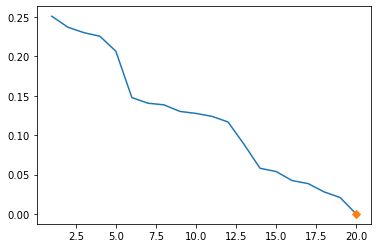


Dataset 02
1 :  0.36493095305738227
2 :  0.35453486779502336
3 :  0.33999364200957843
4 :  0.3248945370324879
5 :  0.3118208804647781
6 :  0.2921779041856817
7 :  0.2700407727473074
8 :  0.1568939810862627
9 :  0.15059150122373663
10 :  0.10363601830617543
11 :  0.07984097704730299
12 :  3.327491228060976e-30
Min recon error for :  (12, 3.327491228060976e-30)


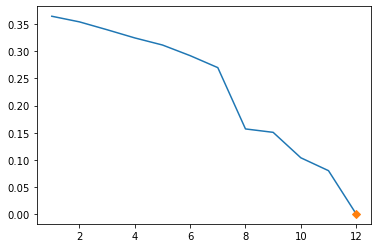

In [368]:
print ("Dataset 01")
getReconError(x_train_01)
print ("\nDataset 02")
getReconError(x_train_02)

In [372]:
def rpTSNE(components, X,Y):
    rp = GaussianRandomProjection(n_components=components, random_state=40)
    trans = rp.fit_transform(X)
    tsneRPPost = TSNE(n_jobs=-1, n_iter=1000, verbose=3,random_state=40)
    tsne_resultstsneRPPost = tsneRPPost.fit_transform(trans)
    palette = sns.color_palette("bright", 2)

    sns.scatterplot(tsne_resultstsneRPPost[:,0], tsne_resultstsneRPPost[:,1], hue=Y, legend='full', palette=palette)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 45136 samples in 0.056s...
[t-SNE] Computed neighbors for 45136 samples in 11.170s...
[t-SNE] Computed conditional probabilities for sample 1000 / 45136
[t-SNE] Computed conditional probabilities for sample 2000 / 45136
[t-SNE] Computed conditional probabilities for sample 3000 / 45136
[t-SNE] Computed conditional probabilities for sample 4000 / 45136
[t-SNE] Computed conditional probabilities for sample 5000 / 45136
[t-SNE] Computed conditional probabilities for sample 6000 / 45136
[t-SNE] Computed conditional probabilities for sample 7000 / 45136
[t-SNE] Computed conditional probabilities for sample 8000 / 45136
[t-SNE] Computed conditional probabilities for sample 9000 / 45136
[t-SNE] Computed conditional probabilities for sample 10000 / 45136
[t-SNE] Computed conditional probabilities for sample 11000 / 45136
[t-SNE] Computed conditional probabilities for sample 12000 / 45136
[t-SNE] Computed conditional probabilities for sa

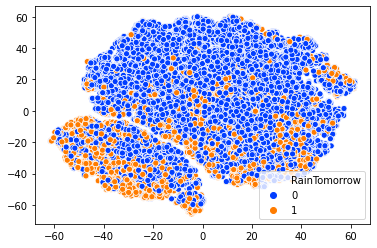

In [370]:
# tsneRPPost = TSNE(n_jobs=-1, n_iter=1000, verbose=3,random_state=40)
# tsne_resultstsneRPPost = tsneRPPost.fit_transform(trans)
# palette = sns.color_palette("bright", 2)

# sns.scatterplot(tsne_resultstsneRPPost[:,0], tsne_resultstsneRPPost[:,1], hue=y_train_01, legend='full', palette=palette)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 172 samples in 0.000s...
[t-SNE] Computed neighbors for 172 samples in 0.015s...
[t-SNE] Computed conditional probabilities for sample 172 / 172
[t-SNE] Mean sigma: 0.727748
[t-SNE] Computed conditional probabilities in 0.007s
[t-SNE] Iteration 50: error = 55.5902138, gradient norm = 0.4959646 (50 iterations in 0.071s)
[t-SNE] Iteration 100: error = 52.9412918, gradient norm = 0.5361798 (50 iterations in 0.068s)
[t-SNE] Iteration 150: error = 53.6445961, gradient norm = 0.5299437 (50 iterations in 0.069s)
[t-SNE] Iteration 200: error = 55.5352249, gradient norm = 0.4885911 (50 iterations in 0.068s)
[t-SNE] Iteration 250: error = 55.2318993, gradient norm = 0.5097907 (50 iterations in 0.064s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.231899
[t-SNE] Iteration 300: error = 0.1743411, gradient norm = 0.0048836 (50 iterations in 0.063s)
[t-SNE] Iteration 350: error = 0.1657159, gradient norm = 0.0004584 (

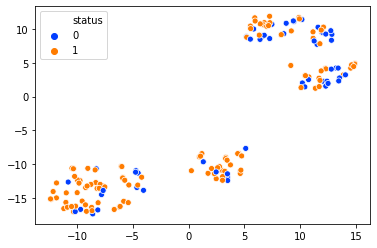

In [373]:
rpTSNE(12, x_train_02, y_train_02)

In [ ]:
rpTSNE(20, x_train_01, y_train_01)

In [31]:
def getKPCAAccuracyScore(X_train, X_test, y_train, y_test):
    component_accuracy = {}
    for component in range(1, X_train.shape[1]+1):
#         print("kernelPCA")
        kpca = SparsePCA(n_components=component, random_state=40, n_jobs=-1)
#         print("kernelPCA done")        
        X_train_ = kpca.fit_transform(X_train)
        print("kernelPCA train transformed")        
        X_test_ = kpca.transform(X_test)
#         print("kernelPCA test transformed")                
        classifier = LogisticRegression(random_state = 0, n_jobs=-1, verbose=3)
#         print("classifier created")                
        classifier.fit(X_train_, y_train)
#         print("classifier fitted")                        
        y_pred = classifier.predict(X_test_)
#         print("classifier predicted")                        
        tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()
#         print("confusion_matrix created")                        
        accuracy = (tp+tn)/(tp+fn+fp+tn)
        print("accuracy")                                
        component_accuracy[component] = accuracy
    print(component_accuracy)
    macAccuracy = max(component_accuracy.items(), key=lambda x: x[1])
    print("Max accuracy for : ",  macAccuracy)
    plt.plot(*zip(*sorted(component_accuracy.items())))
    plt.plot(macAccuracy[0], macAccuracy[1],  marker='D')
    plt.show()

In [26]:
getKPCAAccuracyScore(x_train_01, x_test_01, y_train_01, y_test_01)

kernelPCA train transformed
accuracy


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


kernelPCA train transformed
accuracy


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


kernelPCA train transformed


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


accuracy
kernelPCA train transformed


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


accuracy
kernelPCA train transformed


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


accuracy
kernelPCA train transformed


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


accuracy
kernelPCA train transformed


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


accuracy
kernelPCA train transformed


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


accuracy
kernelPCA train transformed


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


accuracy
kernelPCA train transformed


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


accuracy
kernelPCA train transformed


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


accuracy
kernelPCA train transformed


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished


accuracy
kernelPCA train transformed


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished


accuracy
kernelPCA train transformed


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished


accuracy
kernelPCA train transformed


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished


accuracy
kernelPCA train transformed


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished


accuracy
kernelPCA train transformed


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished


accuracy
kernelPCA train transformed


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.6s finished


accuracy
kernelPCA train transformed


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished


accuracy
kernelPCA train transformed


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.8s finished


accuracy
{1: 0.8110599078341014, 2: 0.8131868131868132, 3: 0.8185926976249557, 4: 0.8238213399503722, 5: 0.8233782346685572, 6: 0.8223147819922013, 7: 0.8247961715703651, 8: 0.8246189294576391, 9: 0.837646224742999, 10: 0.8385324353066289, 11: 0.8387096774193549, 12: 0.8403048564338887, 13: 0.8427862460120524, 14: 0.8475717830556541, 15: 0.8459766040411202, 16: 0.8452676355902162, 17: 0.8465969514356612, 18: 0.8462424672102091, 19: 0.847660404112017, 20: 0.847660404112017}


Max accuracy for :  (19, 0.847660404112017)


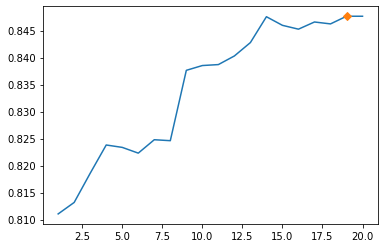

In [30]:
# component_accuracy={1: 0.8110599078341014, 2: 0.8131868131868132, 3: 0.8185926976249557, 4: 0.8238213399503722, 5: 0.8233782346685572, 6: 0.8223147819922013, 7: 0.8247961715703651, 8: 0.8246189294576391, 9: 0.837646224742999, 10: 0.8385324353066289, 11: 0.8387096774193549, 12: 0.8403048564338887, 13: 0.8427862460120524, 14: 0.8475717830556541, 15: 0.8459766040411202, 16: 0.8452676355902162, 17: 0.8465969514356612, 18: 0.8462424672102091, 19: 0.847660404112017, 20: 0.847660404112017}
# macAccuracy = max(component_accuracy.items(), key=lambda x: x[1])
# print("Max accuracy for : ",  macAccuracy)
# plt.plot(*zip(*sorted(component_accuracy.items())))
# plt.plot(macAccuracy[0], macAccuracy[1],  marker='D')
# plt.show()

kernelPCA train transformed
accuracy
kernelPCA train transformed
accuracy


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


kernelPCA train transformed
accuracy
kernelPCA train transformed


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


accuracy
kernelPCA train transformed
accuracy
kernelPCA train transformed
accuracy
kernelPCA train transformed
accuracy
kernelPCA train transformed
accuracy


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


kernelPCA train transformed
accuracy
kernelPCA train transformed
accuracy


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


kernelPCA train transformed
accuracy
kernelPCA train transformed
accuracy
{1: 0.6976744186046512, 2: 0.6976744186046512, 3: 0.6976744186046512, 4: 0.6744186046511628, 5: 0.6744186046511628, 6: 0.6744186046511628, 7: 0.6744186046511628, 8: 0.8372093023255814, 9: 0.7906976744186046, 10: 0.7906976744186046, 11: 0.7906976744186046, 12: 0.813953488372093}
Max accuracy for :  (8, 0.8372093023255814)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


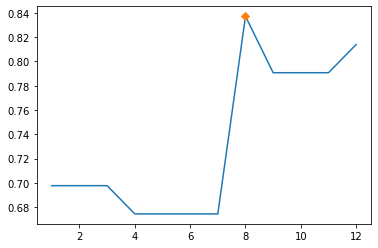

In [32]:
getKPCAAccuracyScore(x_train_02, x_test_02, y_train_02, y_test_02)

In [59]:
def sparsePCATSNE(component, X,Y):
    kpca = SparsePCA(n_components=component, random_state=40, n_jobs=-1)
    trans = kpca.fit_transform(X)
    tsneRPPost = TSNE(n_jobs=-1, n_iter=1000, verbose=3,random_state=40)
    tsne_resultstsneRPPost = tsneRPPost.fit_transform(trans)
    palette = sns.color_palette("bright", 2)

    sns.scatterplot(tsne_resultstsneRPPost[:,0], tsne_resultstsneRPPost[:,1], hue=Y, legend='full', palette=palette)



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 45136 samples in 0.591s...
[t-SNE] Computed neighbors for 45136 samples in 8.292s...
[t-SNE] Computed conditional probabilities for sample 1000 / 45136
[t-SNE] Computed conditional probabilities for sample 2000 / 45136
[t-SNE] Computed conditional probabilities for sample 3000 / 45136
[t-SNE] Computed conditional probabilities for sample 4000 / 45136
[t-SNE] Computed conditional probabilities for sample 5000 / 45136
[t-SNE] Computed conditional probabilities for sample 6000 / 45136
[t-SNE] Computed conditional probabilities for sample 7000 / 45136
[t-SNE] Computed conditional probabilities for sample 8000 / 45136
[t-SNE] Computed conditional probabilities for sample 9000 / 45136
[t-SNE] Computed conditional probabilities for sample 10000 / 45136
[t-SNE] Computed conditional probabilities for sample 11000 / 45136
[t-SNE] Computed conditional probabilities for sample 12000 / 45136
[t-SNE] Computed conditional probabilities for sam

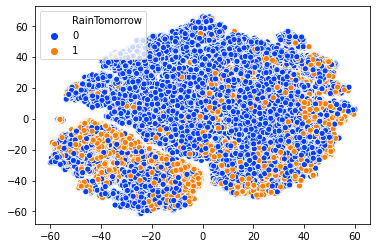

In [36]:
sparsePCATSNE(19, x_train_01,y_train_01)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 172 samples in 0.000s...
[t-SNE] Computed neighbors for 172 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 172 / 172
[t-SNE] Mean sigma: 0.733630
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 59.9028816, gradient norm = 0.5401431 (50 iterations in 0.043s)
[t-SNE] Iteration 100: error = 61.7469330, gradient norm = 0.5345226 (50 iterations in 0.032s)
[t-SNE] Iteration 150: error = 59.9007072, gradient norm = 0.5230304 (50 iterations in 0.026s)
[t-SNE] Iteration 200: error = 59.4403915, gradient norm = 0.5379741 (50 iterations in 0.025s)
[t-SNE] Iteration 250: error = 59.8865204, gradient norm = 0.5731505 (50 iterations in 0.036s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.886520
[t-SNE] Iteration 300: error = 0.6738219, gradient norm = 0.0086924 (50 iterations in 0.028s)
[t-SNE] Iteration 350: error = 0.4576614, gradient norm = 0.0032762 (

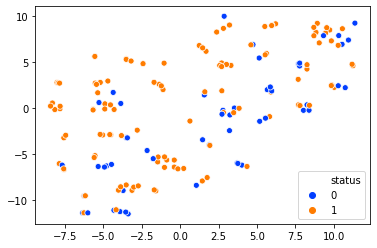

In [60]:
sparsePCATSNE(8, x_train_02,y_train_02)

In [11]:
def PCAReduced(components, X):
    pca = PCA(n_components=components, random_state=40)
    principalComponents = pca.fit_transform(X)
    return principalComponents
def ICAReduced(ica_components, X, ica_features):
    ica = FastICA(n_components=ica_components, random_state=40)
    S_ = ica.fit_transform(X[ica_features])
    return S_
def RandomP(rand_comp, X):
    rp = GaussianRandomProjection(n_components=rand_comp, random_state=40)
    trans = rp.fit_transform(X)
    return trans
def SPCA(sparse_comp, X):
    kpca = SparsePCA(n_components=sparse_comp, random_state=40, n_jobs=1)
    trans = kpca.fit_transform(X)
    return trans

In [29]:
def clusteringLog(X_to_fit, Y, label, clusters, em_comp ):
    kmeans_01 = KMeans(init="k-means++", n_clusters=clusters, n_init=40, max_iter=1000, random_state=40)
    kmeans_01.fit(X_to_fit)
    print("KMeans "+label)
    get_homo_comp_scores(Y, kmeans_01.labels_)
    print("\n")
    gmm_01 = mixture.GaussianMixture(n_components=em_comp, covariance_type="full", random_state=40)
    gmm_labels_01 = gmm_01.fit_predict(X_to_fit)
    print("EM "+label)
    get_homo_comp_scores(Y, gmm_labels_01)
    print("\n")
    
def kmeansOnReducedData(label, pca_components, X, Y, clusters, em_comp, ica_components, ica_features, rand_comp, sparse_comp):

    principalComponents = PCAReduced(pca_components, X)
    clusteringLog(principalComponents, Y, label + " After PCA", clusters, em_comp)
    
    S_ = ICAReduced(ica_components, X, ica_features)
    clusteringLog(S_, Y, label + " After ICA", clusters, em_comp)

    trans = RandomP(rand_comp, X)
    clusteringLog(trans, Y, label + " After Random Projections", clusters, em_comp)

    
    trans2 = SPCA(sparse_comp, X)
    clusteringLog(trans2, Y, label + " After SparsePCA", clusters, em_comp)


In [19]:
kmeansOnReducedData(label="for reduced Dataset1: ", pca_components=8, X=x_train_01, Y=y_train_01, clusters=3, em_comp=2, ica_components=11, ica_features=[1,2,3,4,6,7,8,12,16,18,19], rand_comp=20, sparse_comp=19)

KMeans for reduced Dataset1:  After PCA
homogeneity_score : 0.152497
completeness_score: 0.075518


EM for reduced Dataset1:  After PCA
homogeneity_score : 0.082007
completeness_score: 0.081959


KMeans for reduced Dataset1:  After ICA
homogeneity_score : 0.141788
completeness_score: 0.070007


EM for reduced Dataset1:  After ICA
homogeneity_score : 0.082007
completeness_score: 0.081959


KMeans for reduced Dataset1:  After Random Projections
homogeneity_score : 0.087736
completeness_score: 0.042525


EM for reduced Dataset1:  After Random Projections
homogeneity_score : 0.082007
completeness_score: 0.081959


KMeans for reduced Dataset1:  After SparsePCA
homogeneity_score : 0.152167
completeness_score: 0.075336


EM for reduced Dataset1:  After SparsePCA
homogeneity_score : 0.082007
completeness_score: 0.081959




In [20]:
kmeansOnReducedData(label="for reduced Dataset2: ", pca_components=7, X=x_train_02, Y=y_train_02, clusters=4, em_comp=42, ica_components=5, ica_features=[1,7,8,9,10], rand_comp=12, sparse_comp=8)

KMeans for reduced Dataset2:  After PCA
homogeneity_score : 0.053601
completeness_score: 0.024139


EM for reduced Dataset2:  After PCA
homogeneity_score : 0.356233
completeness_score: 0.061595


KMeans for reduced Dataset2:  After ICA
homogeneity_score : 0.052061
completeness_score: 0.023394


EM for reduced Dataset2:  After ICA
homogeneity_score : 0.513248
completeness_score: 0.091502


KMeans for reduced Dataset2:  After Random Projections
homogeneity_score : 0.060448
completeness_score: 0.028061


EM for reduced Dataset2:  After Random Projections
homogeneity_score : 0.290463
completeness_score: 0.050268


KMeans for reduced Dataset2:  After SparsePCA
homogeneity_score : 0.055085
completeness_score: 0.024784


EM for reduced Dataset2:  After SparsePCA
homogeneity_score : 0.358717
completeness_score: 0.062598




In [21]:
def get_score(model, x_train, x_test, y_train, y_test ):
    start_time = time.time()
    model.fit(x_train, y_train)
    elapsed_time = time.time() - start_time
    print("Training time: ",elapsed_time)
    start_time = time.time()
    score = model.score(x_test, y_test)
    elapsed_time = time.time() - start_time
    print("Test time: ",elapsed_time)
    print("Score: ", score)

In [25]:

def calculate_learning_curve(train_sizes, X, y, classifier, n_jobs=-1):
#     features = strat_train_set.columns[:-1]
#     target = strat_train_set.columns[-1]
    return learning_curve(
    estimator = classifier,
    X = X,
#         X=data_no_na[features],
    y = y, 
#     y = data_no_na[target],       strat_train_set
        train_sizes = train_sizes, cv = 5,
    scoring = 'f1', n_jobs=n_jobs, random_state=40, verbose=3)#shuffle=True, random_state=40
    

def plot_graphs(title, train_sizes, train_scores, validation_scores):
    train_scores_mean = (train_scores.mean(axis = 1))
    validation_scores_mean = (validation_scores.mean(axis = 1))
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label = 'Training Score')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation Score')
    plt.ylabel('Score', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title(title, fontsize = 18, y = 1.03)
    plt.text(train_sizes[-1], train_scores_mean[-1]+0.01, train_scores_mean[-1])
    plt.text(train_sizes[-1], validation_scores_mean[-1]-0.02, validation_scores_mean[-1])
    plt.legend()
    ylim_max = 1 #np.nanmax(validation_scores_mean)
    ylim_min = 0 #np.nanmin(validation_scores_mean)
    plt.ylim(ylim_min, ylim_max)
    print("Training Score: ", train_scores_mean[-1]) 
    print("Cross validation Score: ", validation_scores_mean[-1])
    
def plot_learning_curve(label, train_sizes,X, y, classifier, n_jobs=-1):
    start_time = time.time()
    train_sizes, train_scores, validation_scores = calculate_learning_curve(train_sizes,X, y, classifier, n_jobs=n_jobs)
    elapsed_time = time.time() - start_time
    print("Learning curve time: ",elapsed_time)
    plot_graphs('Learning curve holding out testing data '+label, train_sizes, train_scores, validation_scores)  
  

In [57]:
train_sizes_01 = [1, 100, 500, 2000, 5000, 10000, 20000, 36108]#, 45136]
train_sizes_02 = [1, 10, 20, 40, 60, 80, 100, 137]#, 45136]

def dataset_1_classifier():
    return MLPClassifier(activation='logistic',solver='adam',learning_rate='adaptive',learning_rate_init= 0.0001,max_iter=5000,momentum=0.1, warm_start=False,hidden_layer_sizes=(300,400),alpha=0.00001, random_state=40)
def dataset_2_classifier():
    return MLPClassifier(activation='logistic',solver='adam',learning_rate='adaptive',learning_rate_init= 0.0001,max_iter=5000,momentum=0.1, warm_start=False, hidden_layer_sizes=(300,),alpha=0.00001, random_state=40)

pca_reduced_dataset_1 = PCAReduced(8, x_train_01)
pca_reduced_test_dataset_1 = PCAReduced(8, x_test_01)

pca_reduced_dataset_2 = PCAReduced(7, x_train_02)
pca_reduced_test_dataset_2 = PCAReduced(7, x_test_02)

ica_reduced_dataset_1 = ICAReduced(ica_components=11, X=x_train_01, ica_features=[1,2,3,4,6,7,8,12,16,18,19])
ica_reduced_test_dataset_1 = ICAReduced(ica_components=11, X=x_test_01, ica_features=[1,2,3,4,6,7,8,12,16,18,19])

ica_reduced_dataset_2 = ICAReduced(ica_components=5, X=x_train_02, ica_features=[1,7,8,9,10])
ica_reduced_test_dataset_2 = ICAReduced(ica_components=5, X=x_test_02, ica_features=[1,7,8,9,10])

rp_reduced_dataset_1 = RandomP(rand_comp=20, X=x_train_01)
rp_reduced_test_dataset_1 = RandomP(rand_comp=20, X=x_test_01)

rp_reduced_dataset_2 = RandomP(rand_comp=12, X=x_train_02)
rp_reduced_test_dataset_2 = RandomP(rand_comp=12, X=x_test_02)

spca_reduced_dataset_1 = SPCA(sparse_comp=19, X=x_train_01)
spca_reduced_test_dataset_1 =  SPCA(sparse_comp=19, X=x_test_01)

spca_reduced_dataset_2 = SPCA(sparse_comp=8, X=x_train_02)
spca_reduced_test_dataset_2 =  SPCA(sparse_comp=8, X=x_test_02)



/Users/mandads/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


[learning_curve] Training set sizes: [    1   100   500  2000  5000 10000 20000 36108]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  40 | elapsed:  2.0min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done  27 out of  40 | elapsed:  4.3min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  5.7min finished


Learning curve time:  343.76853704452515
Training Score:  0.5208705994203037
Cross validation Score:  0.5191577475959863


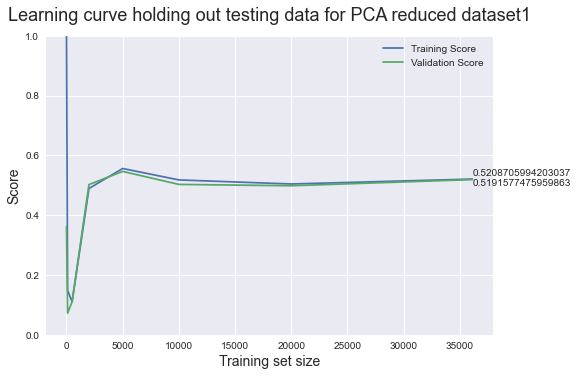

In [58]:
plot_learning_curve(label='for PCA reduced dataset1', train_sizes=train_sizes_01,X=pca_reduced_dataset_1, y= y_train_01, classifier=dataset_1_classifier(), n_jobs=-1)



In [59]:
get_score(dataset_1_classifier(), pca_reduced_dataset_1, pca_reduced_test_dataset_1, y_train_01, y_test_01)

Training time:  47.24098825454712
Test time:  0.19351816177368164
Score:  0.8120347394540943


[learning_curve] Training set sizes: [  1  10  20  40  60  80 100 137]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  40 | elapsed:    0.5s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  27 out of  40 | elapsed:    0.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.4s finished


Learning curve time:  2.451200008392334
Training Score:  0.8128213815170338
Cross validation Score:  0.8137479877367293


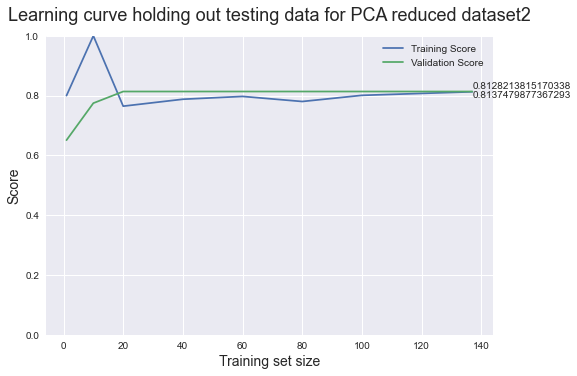

In [60]:
plot_learning_curve(label='for PCA reduced dataset2', train_sizes=train_sizes_02,X=pca_reduced_dataset_2, y= y_train_02, classifier=dataset_2_classifier(), n_jobs=-1)


In [61]:
get_score(dataset_2_classifier(), pca_reduced_dataset_2, pca_reduced_test_dataset_2, y_train_02, y_test_02)

Training time:  0.2988262176513672
Test time:  0.0021820068359375
Score:  0.6976744186046512


[learning_curve] Training set sizes: [    1   100   500  2000  5000 10000 20000 36108]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  40 | elapsed:   14.1s remaining:   29.2s
[Parallel(n_jobs=-1)]: Done  27 out of  40 | elapsed:   43.5s remaining:   21.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.8min finished


Learning curve time:  106.21046686172485
Training Score:  0.0
Cross validation Score:  0.0


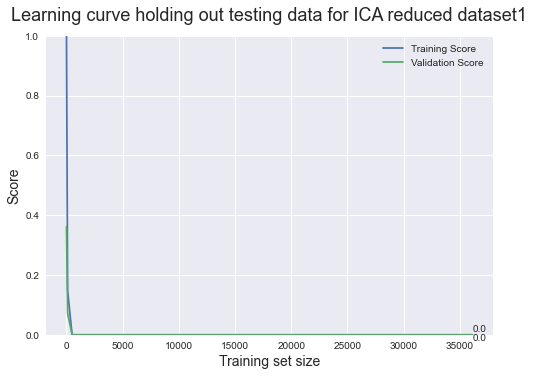

In [62]:
plot_learning_curve(label='for ICA reduced dataset1', train_sizes=train_sizes_01,X=ica_reduced_dataset_1, y= y_train_01, classifier=dataset_1_classifier(), n_jobs=-1)

In [63]:
get_score(dataset_1_classifier(), ica_reduced_dataset_1, ica_reduced_test_dataset_1, y_train_01, y_test_01)

Training time:  257.9813060760498
Test time:  0.16230106353759766
Score:  0.5792272243885147


[learning_curve] Training set sizes: [  1  10  20  40  60  80 100 137]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  40 | elapsed:    0.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  27 out of  40 | elapsed:    0.6s remaining:    0.3s


Learning curve time:  0.9443862438201904
Training Score:  0.8128213815170338
Cross validation Score:  0.8137479877367293


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.9s finished


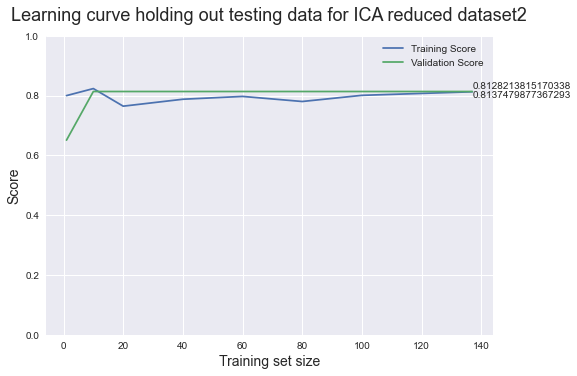

In [64]:
plot_learning_curve(label='for ICA reduced dataset2', train_sizes=train_sizes_02,X=ica_reduced_dataset_2, y= y_train_02, classifier=dataset_2_classifier(), n_jobs=-1)

In [65]:
get_score(dataset_2_classifier(), ica_reduced_dataset_2, ica_reduced_test_dataset_2, y_train_02, y_test_02)

Training time:  0.13562607765197754
Test time:  0.0016367435455322266
Score:  0.6976744186046512


[learning_curve] Training set sizes: [    1   100   500  2000  5000 10000 20000 36108]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  40 | elapsed:  3.1min remaining:  6.4min
[Parallel(n_jobs=-1)]: Done  27 out of  40 | elapsed: 11.6min remaining:  5.6min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 29.4min finished


Learning curve time:  1765.4985208511353
Training Score:  0.5943372898904536
Cross validation Score:  0.5942538242472647


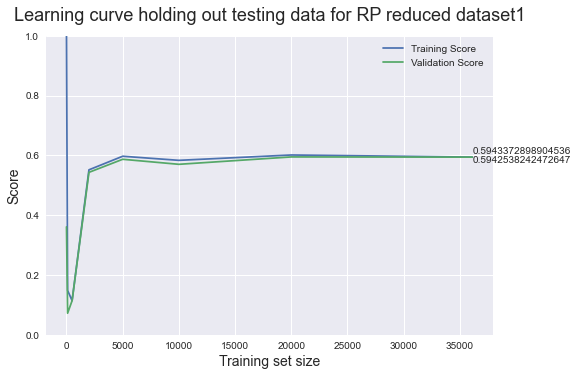

In [66]:
plot_learning_curve(label='for RP reduced dataset1', train_sizes=train_sizes_01,X=rp_reduced_dataset_1, y= y_train_01, classifier=dataset_1_classifier(), n_jobs=-1)

In [67]:
get_score(dataset_1_classifier(), rp_reduced_dataset_1, rp_reduced_test_dataset_1, y_train_01, y_test_01)

Training time:  285.1997299194336
Test time:  0.15321803092956543
Score:  0.8469514356611131


[learning_curve] Training set sizes: [  1  10  20  40  60  80 100 137]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  40 | elapsed:    3.9s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  27 out of  40 | elapsed:    4.5s remaining:    2.2s


Learning curve time:  5.705570936203003
Training Score:  0.8128213815170338
Cross validation Score:  0.8137479877367293


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    5.7s finished


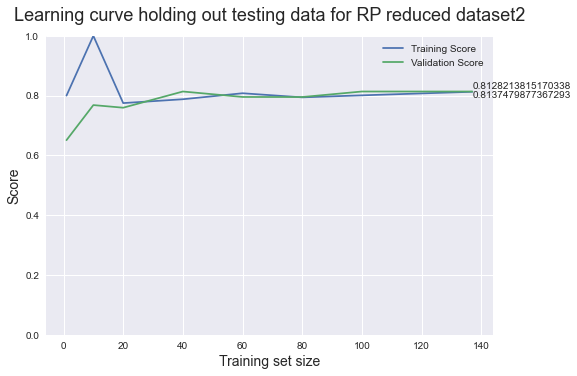

In [68]:
plot_learning_curve(label='for RP reduced dataset2', train_sizes=train_sizes_02,X=rp_reduced_dataset_2, y= y_train_02, classifier=dataset_2_classifier(), n_jobs=-1)

In [69]:
get_score(dataset_2_classifier(), rp_reduced_dataset_2, rp_reduced_test_dataset_2, y_train_02, y_test_02)

Training time:  0.1799769401550293
Test time:  0.00214385986328125
Score:  0.6976744186046512


[learning_curve] Training set sizes: [    1   100   500  2000  5000 10000 20000 36108]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  40 | elapsed:  3.7min remaining:  7.7min
[Parallel(n_jobs=-1)]: Done  27 out of  40 | elapsed:  9.4min remaining:  4.5min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 14.9min finished


Learning curve time:  894.9189748764038
Training Score:  0.6238209508447697
Cross validation Score:  0.622965050214988


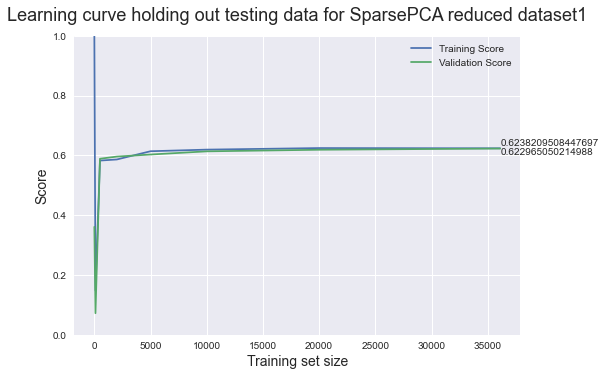

In [70]:
plot_learning_curve(label='for SparsePCA reduced dataset1', train_sizes=train_sizes_01,X=spca_reduced_dataset_1, y= y_train_01, classifier=dataset_1_classifier(), n_jobs=-1)

In [71]:
get_score(dataset_1_classifier(), spca_reduced_dataset_1, spca_reduced_test_dataset_1, y_train_01, y_test_01)

Training time:  120.69052577018738
Test time:  0.142791748046875
Score:  0.6669620701878767


[learning_curve] Training set sizes: [  1  10  20  40  60  80 100 137]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  40 | elapsed:    2.6s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  27 out of  40 | elapsed:    4.1s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    5.4s finished


Learning curve time:  5.441986083984375
Training Score:  0.8110752480490424
Cross validation Score:  0.8062181597785314


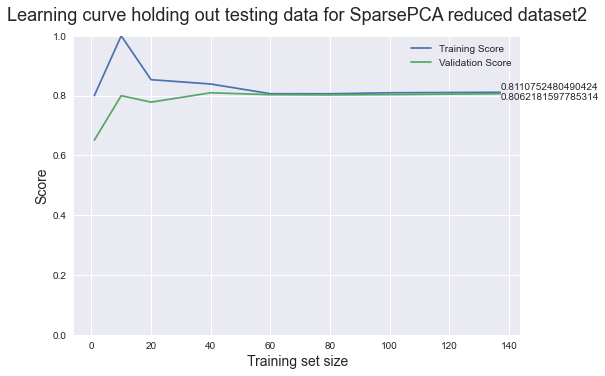

In [72]:
plot_learning_curve(label='for SparsePCA reduced dataset2', train_sizes=train_sizes_02,X=spca_reduced_dataset_2, y= y_train_02, classifier=dataset_2_classifier(), n_jobs=-1)

In [73]:
get_score(dataset_2_classifier(), spca_reduced_dataset_2, spca_reduced_test_dataset_2, y_train_02, y_test_02)

Training time:  0.04942202568054199
Test time:  0.007318019866943359
Score:  0.6976744186046512


In [74]:
kmeans_01_nn = KMeans(init="k-means++", n_clusters=3, n_init=40, max_iter=1000, random_state=40)
kmeans_01_nn.fit(x_train_01)
x_train_cluster_col_01 = x_train_01.copy()
x_train_cluster_col_01.insert(20, 20, kmeans_01_nn.labels_)
x_train_cluster_col_01
gmm_01_nn = mixture.GaussianMixture(n_components=2, covariance_type="full", random_state=40)
gmm_labels_01_nn = gmm_01_nn.fit_predict(x_train_01)
x_train_cluster_col_01.insert(21, 21, gmm_labels_01_nn)
x_train_cluster_col_01

kmeans_01_nn_test = KMeans(init="k-means++", n_clusters=3, n_init=40, max_iter=1000, random_state=40)
kmeans_01_nn_test.fit(x_test_01)
x_test_cluster_col_01 = x_test_01.copy()
x_test_cluster_col_01.insert(20, 20, kmeans_01_nn_test.labels_)
x_test_cluster_col_01
gmm_01_nn_test = mixture.GaussianMixture(n_components=2, covariance_type="full", random_state=40)
gmm_labels_01_nn_test = gmm_01_nn_test.fit_predict(x_test_01)
x_test_cluster_col_01.insert(21, 21, gmm_labels_01_nn_test)
x_test_cluster_col_01

0         1         2         3         4         5         6   \
0      0.483051  0.449173  0.000000  0.061576  0.750000  0.400000  0.160377   
1      0.545198  0.352246  0.001188  0.056650  0.150000  0.800000  0.452830   
2      0.536723  0.503546  0.000000  0.073892  0.785714  0.333333  0.264151   
3      0.338983  0.342790  0.000000  0.081281  0.307143  0.266667  0.056604   
4      0.725989  0.666667  0.005938  0.059113  0.864286  0.066667  0.320755   
...         ...       ...       ...       ...       ...       ...       ...   
11279  0.378531  0.255319  0.000000  0.061576  0.271429  0.466667  0.792453   
11280  0.355932  0.416076  0.000000  0.049261  0.278571  1.000000  0.330189   
11281  0.488701  0.591017  0.000000  0.061576  0.500000  0.200000  0.226415   
11282  0.672316  0.895981  0.000000  0.147783  0.950000  0.866667  0.245283   
11283  0.274011  0.191489  0.000000  0.027094  0.300000  0.733333  0.349057   

             7         8         9   ...    12        13        14     15  \
0      0.200000  0.266667  0.147541  ...  0.36  0.691871  0.664078  0.125   
1      0.933333  0.800000  0.147541  ...  0.89  0.466919  0.462136  1.000   
2      0.466667  0.266667  0.245902  ...  0.41  0.572779  0.532039  0.125   
3      0.066667  0.200000  0.032787  ...  0.50  0.765595  0.763107  1.000   
4      0.133333  1.000000  0.245902  ...  0.43  0.553875  0.522330  0.625   
...         ...       ...       ...  ...   ...       ...       ...    ...   
11279  0.733333  0.533333  0.475410  ...  0.76  0.529301  0.592233  0.375   
11280  0.133333  0.933333  0.114754  ...  0.42  0.551985  0.514563  0.375   
11281  0.733333  0.200000  0.147541  ...  0.32  0.559546  0.512621  1.000   
11282  0.933333  0.666667  0.245902  ...  0.09  0.527410  0.520388  0.125   
11283  0.733333  0.733333  0.393443  ...  0.69  0.676749  0.693204  0.125   

          16        17        18   19  20  21  
0      0.000  0.397985  0.456311  0.0   0   0  
1      0.750  0.448363  0.371359  0.0   2   0  
2      0.125  0.528967  0.500000  0.0   0   0  
3      0.875  0.239295  0.332524  0.0   2   0  
4      0.625  0.607053  0.657767  0.0   0   0  
...      ...       ...       ...  ...  ..  ..  
11279  0.875  0.277078  0.206311  0.0   2   0  
11280  0.875  0.382872  0.432039  0.0   2   0  
11281  0.500  0.425693  0.599515  0.0   2   0  
11282  0.125  0.793451  0.917476  0.0   0   0  
11283  0.875  0.206549  0.177184  0.0   2   0  

[11284 rows x 22 columns]

[learning_curve] Training set sizes: [    1   100   500  2000  5000 10000 20000 36108]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  40 | elapsed:  3.7min remaining:  7.7min
[Parallel(n_jobs=-1)]: Done  27 out of  40 | elapsed: 11.5min remaining:  5.5min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 16.5min finished


Learning curve time:  987.3865206241608
Training Score:  0.6113659376688052
Cross validation Score:  0.6104644456010085


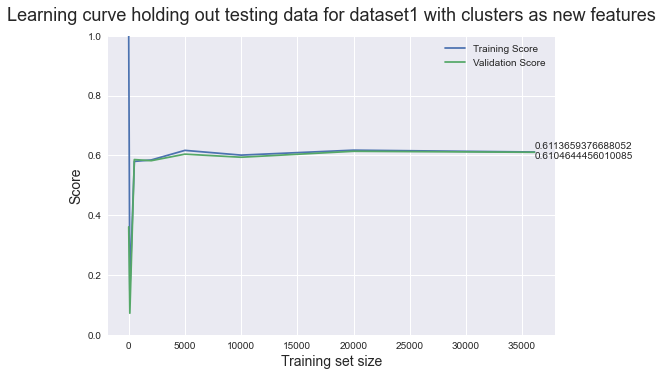

In [75]:
plot_learning_curve(label='for dataset1 with clusters as new features', train_sizes=train_sizes_01,X=x_train_cluster_col_01, y= y_train_01, classifier=dataset_1_classifier(), n_jobs=-1)

In [ ]:
get_score(dataset_1_classifier(), x_train_cluster_col_01, x_test_cluster_col_01, y_train_01, y_test_01)

In [ ]:
# x_train_02

In [ ]:
kmeans_02_nn = KMeans(init="k-means++", n_clusters=2, n_init=40, max_iter=1000, random_state=40)
kmeans_02_nn.fit(x_train_02)
x_train_cluster_col_02 = x_train_02.copy()
x_train_cluster_col_02.insert(12, 12, kmeans_02_nn.labels_)
x_train_cluster_col_02
gmm_02_nn = mixture.GaussianMixture(n_components=42, covariance_type="full", random_state=40)
gmm_labels_02_nn = gmm_02_nn.fit_predict(x_train_02)
x_train_cluster_col_02.insert(13, 13, gmm_labels_02_nn)
x_train_cluster_col_02

kmeans_02_nn_test = KMeans(init="k-means++", n_clusters=2, n_init=40, max_iter=1000, random_state=40)
kmeans_02_nn_test.fit(x_test_02)
x_test_cluster_col_02 = x_test_02.copy()
x_test_cluster_col_02.insert(12, 12, kmeans_02_nn_test.labels_)
x_test_cluster_col_02
gmm_02_nn_test = mixture.GaussianMixture(n_components=42, covariance_type="full", random_state=40)
gmm_labels_02_nn_test = gmm_02_nn_test.fit_predict(x_test_02)
x_test_cluster_col_02.insert(13, 13, gmm_labels_02_nn_test)
# x_test_cluster_col_02

In [ ]:
plot_learning_curve(label='for dataset2 with clusters as new features', train_sizes=train_sizes_02,X=x_train_cluster_col_02, y= y_train_02, classifier=dataset_2_classifier(), n_jobs=-11)

In [ ]:
get_score(dataset_2_classifier(), x_train_cluster_col_02, x_test_cluster_col_02, y_train_02, y_test_02)

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.2147454584608705
For n_clusters = 3 The average silhouette_score is : 0.21935104362223212
For n_clusters = 4 The average silhouette_score is : 0.19332489673913636
For n_clusters = 5 The average silhouette_score is : 0.17109910846432477
For n_clusters = 6 The average silhouette_score is : 0.15925937961039394


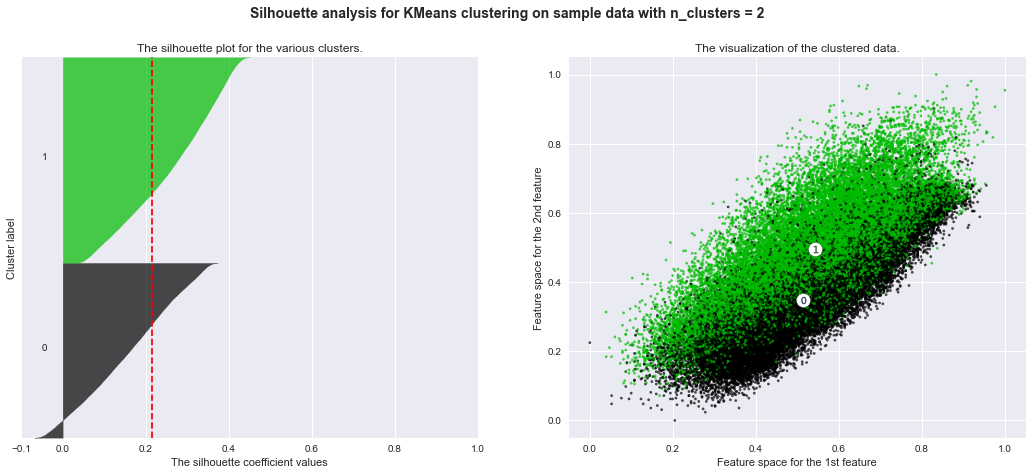

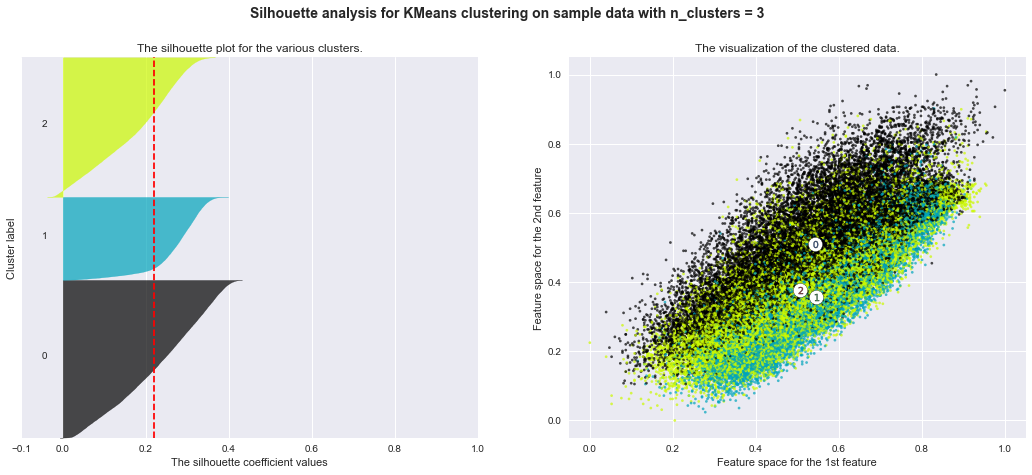

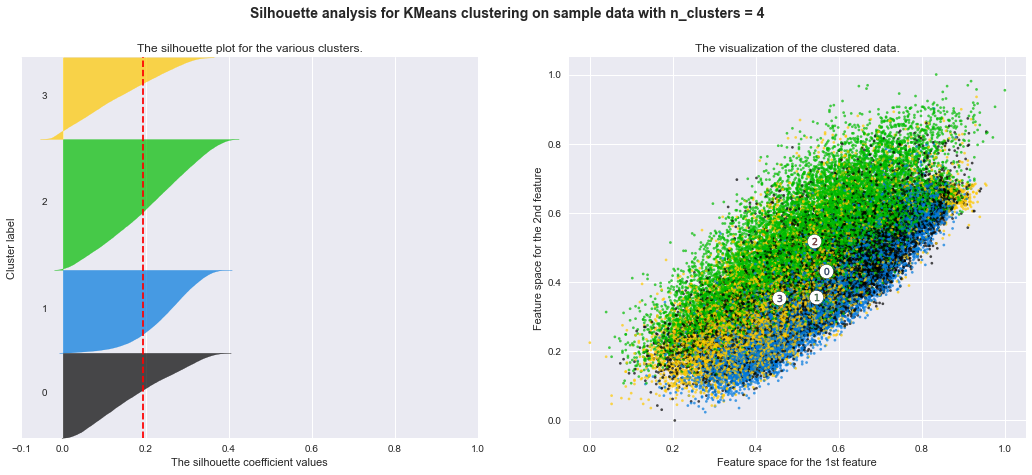

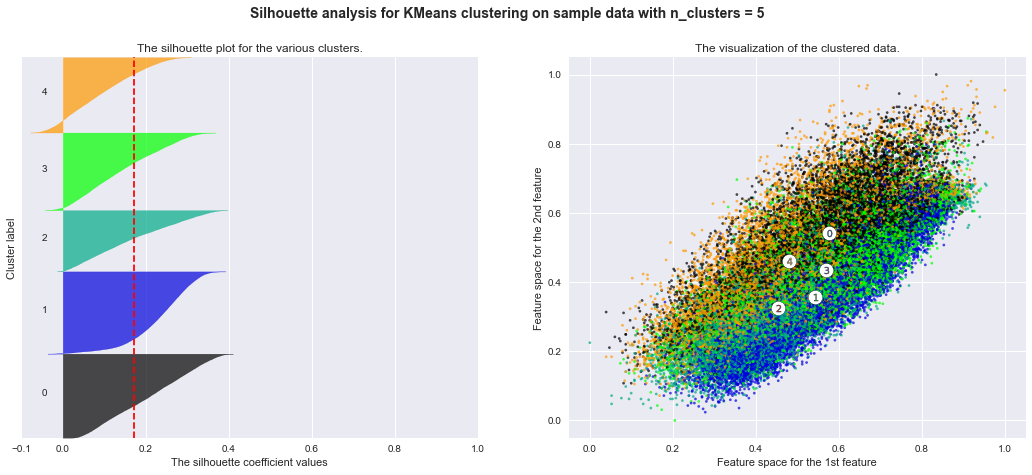

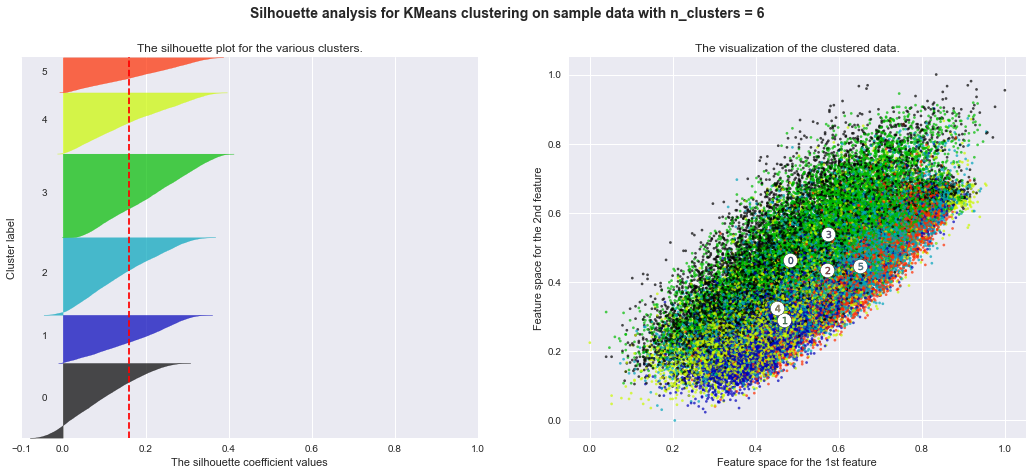

In [93]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = x_train_01.values, y_train_01

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.18589536087594027
For n_clusters = 3 The average silhouette_score is : 0.18212322408407874
For n_clusters = 4 The average silhouette_score is : 0.18855790745177758
For n_clusters = 5 The average silhouette_score is : 0.18795976860828126
For n_clusters = 6 The average silhouette_score is : 0.18710078077501432
For n_clusters = 7 The average silhouette_score is : 0.21105044151074617
For n_clusters = 8 The average silhouette_score is : 0.20329082218116906
For n_clusters = 9 The average silhouette_score is : 0.21499757256796084
For n_clusters = 10 The average silhouette_score is : 0.21313909648303142
For n_clusters = 11 The average silhouette_score is : 0.2249171160122465
For n_clusters = 12 The average silhouette_score is : 0.2332316608581295
For n_clusters = 13 The average silhouette_score is : 0.2398196902866574
For n_clusters = 14 The average silhouette_score is : 0.25

<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 22 The average silhouette_score is : 0.30044612138234045


<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)
<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 23 The average silhouette_score is : 0.3046892011855193
For n_clusters = 24 The average silhouette_score is : 0.31465041716481296


<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)
<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 25 The average silhouette_score is : 0.31517509737020555
For n_clusters = 26 The average silhouette_score is : 0.32699797890454596


<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)
<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 27 The average silhouette_score is : 0.33313205309289246
For n_clusters = 28 The average silhouette_score is : 0.32535610889220934


<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 29 The average silhouette_score is : 0.33042573083326593


<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 30 The average silhouette_score is : 0.3361558625008738
For n_clusters = 31 The average silhouette_score is : 0.34947017728311547


<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)
<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 32 The average silhouette_score is : 0.3490571397295776
For n_clusters = 33 The average silhouette_score is : 0.3579874758184964


<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)
<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 34 The average silhouette_score is : 0.36301874224851544


<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 35 The average silhouette_score is : 0.36570900061789285


<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)
<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 36 The average silhouette_score is : 0.35188101060688554
For n_clusters = 37 The average silhouette_score is : 0.3589814282794299


<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 38 The average silhouette_score is : 0.3596439745755623


<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 39 The average silhouette_score is : 0.3632075385899853


<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 40 The average silhouette_score is : 0.37112705981493493


<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 41 The average silhouette_score is : 0.3690211243875528


<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 42 The average silhouette_score is : 0.3755534253833211


<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 43 The average silhouette_score is : 0.3685212738483612


<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 44 The average silhouette_score is : 0.3538965614664485


<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 45 The average silhouette_score is : 0.35646829423863624


<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 46 The average silhouette_score is : 0.3693688056042162


<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 47 The average silhouette_score is : 0.3698778407975924


<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 48 The average silhouette_score is : 0.36583284193049814


<ipython-input-96-d49889fd8d97>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 49 The average silhouette_score is : 0.37125479954493135


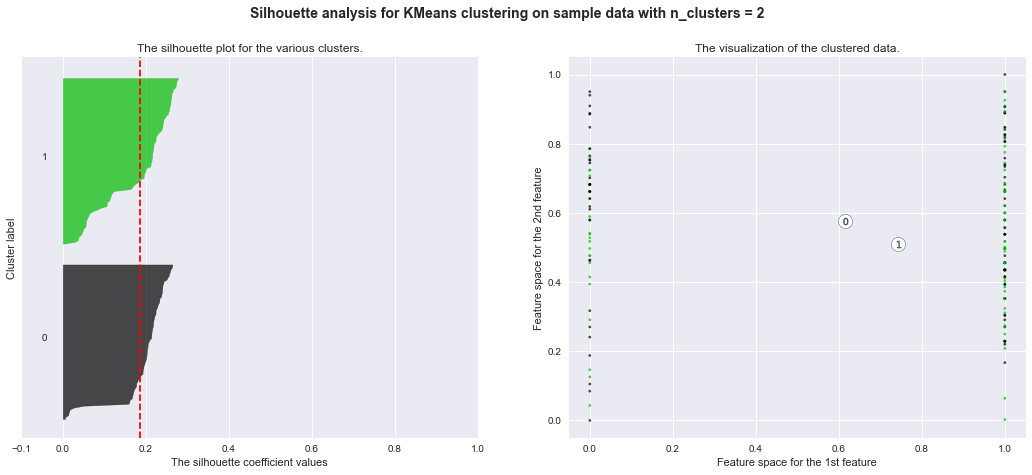

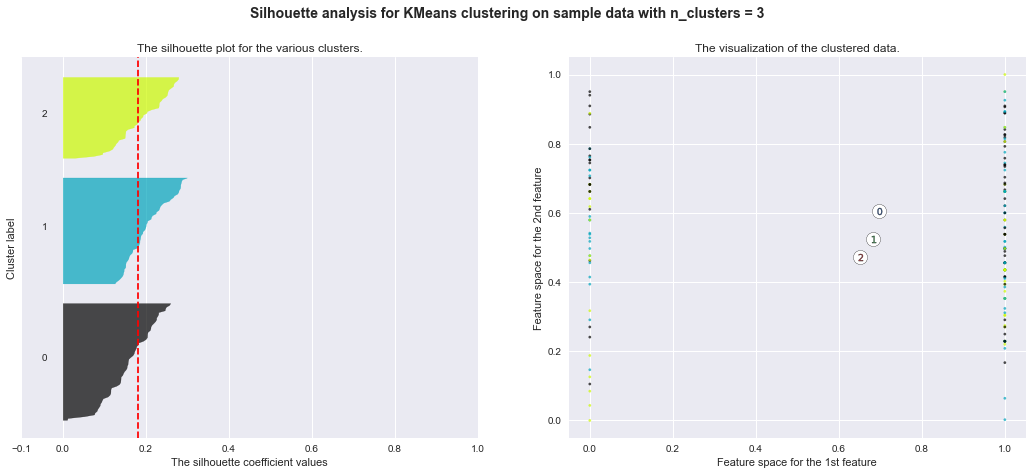

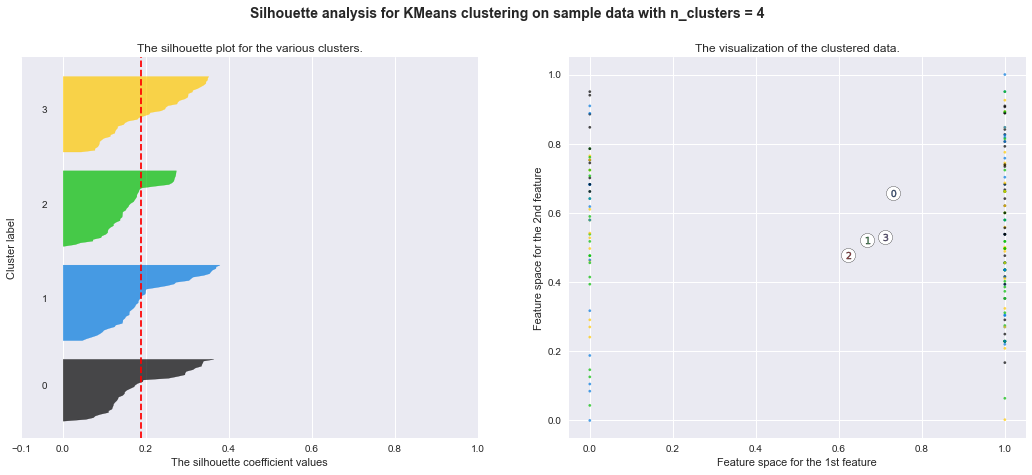

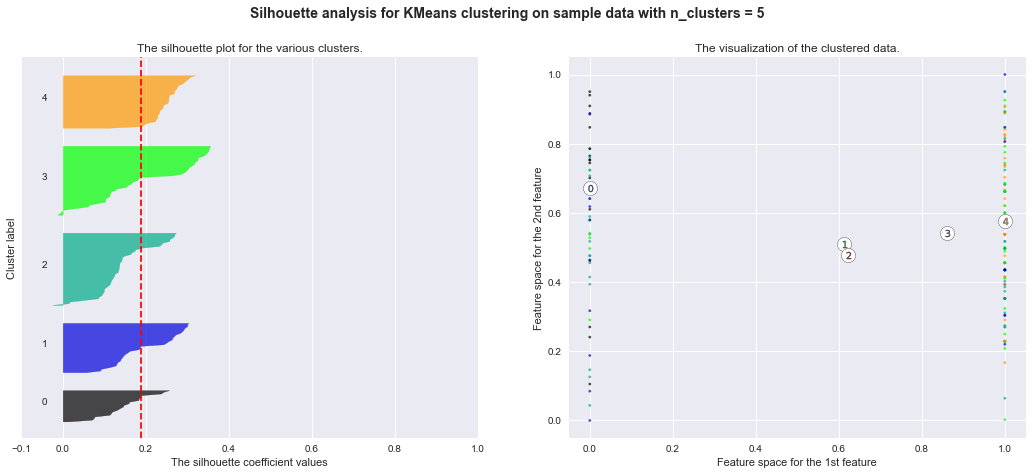

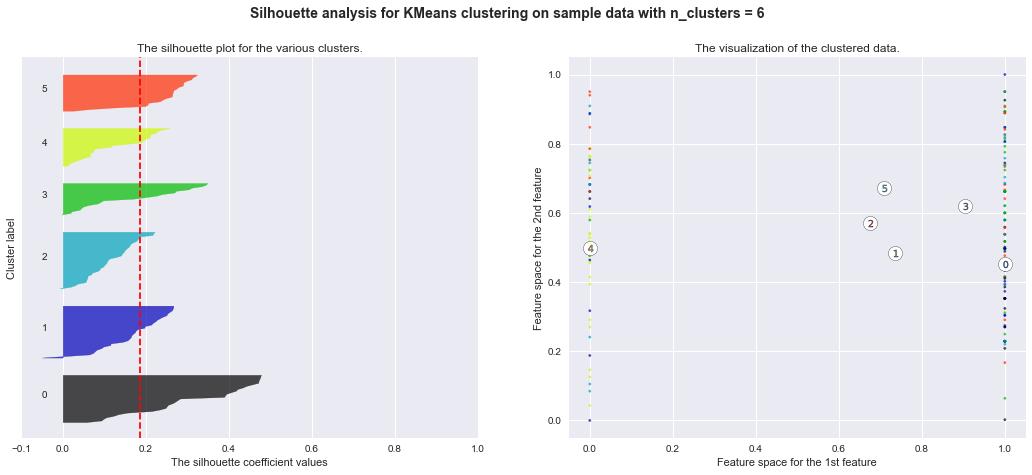

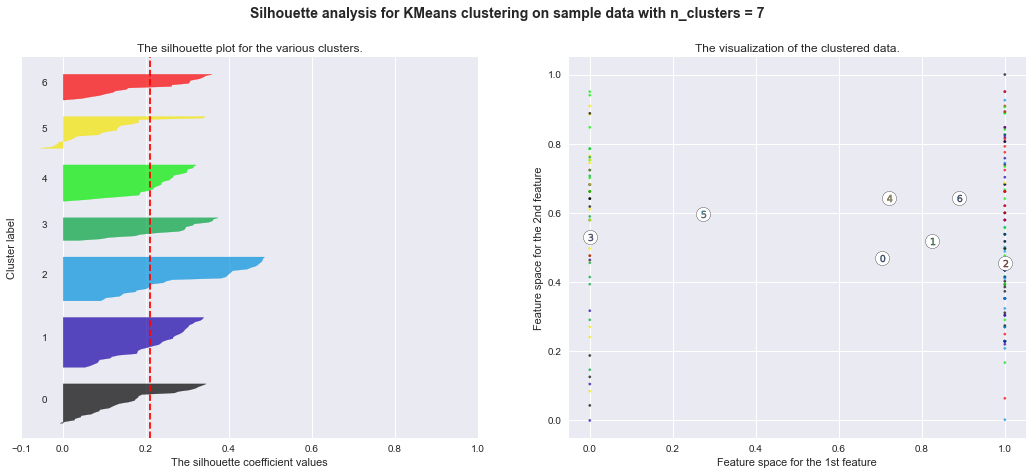

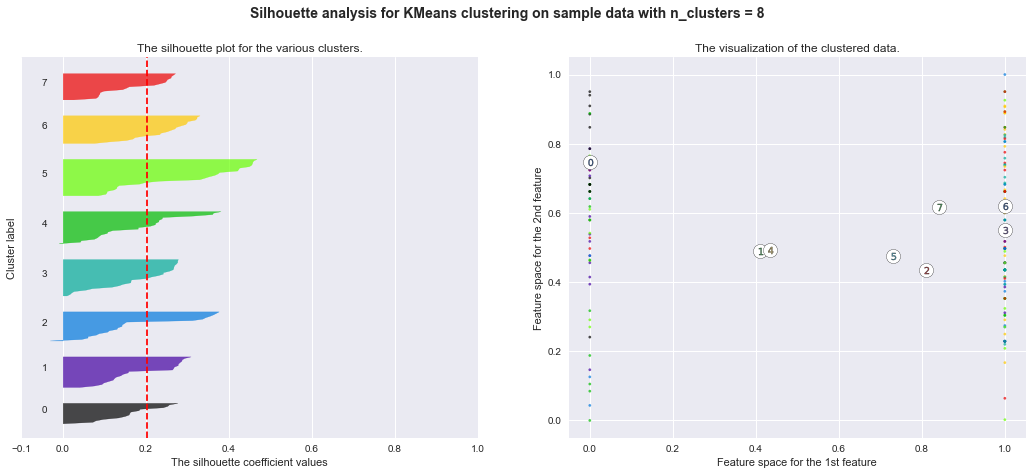

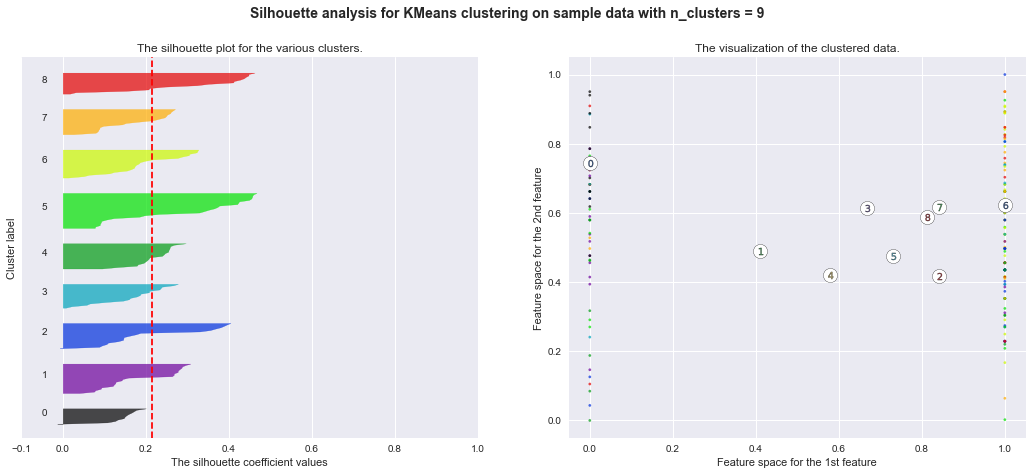

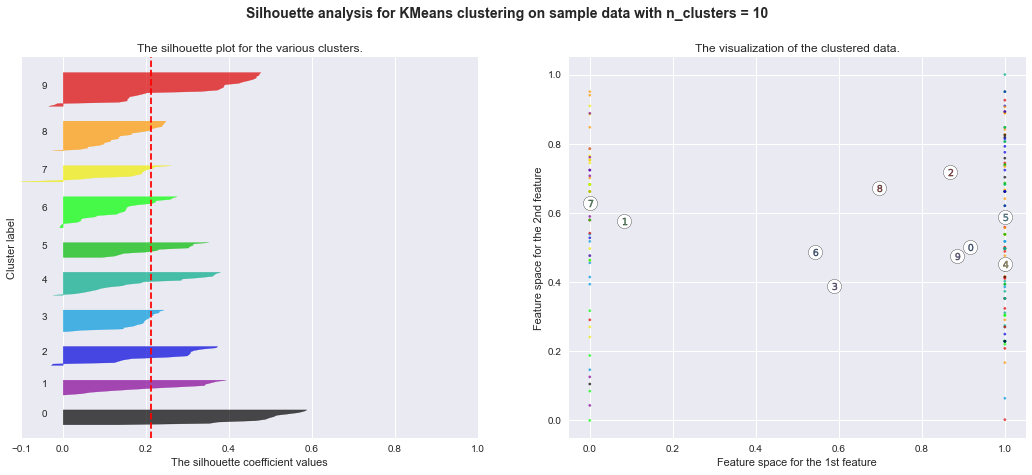

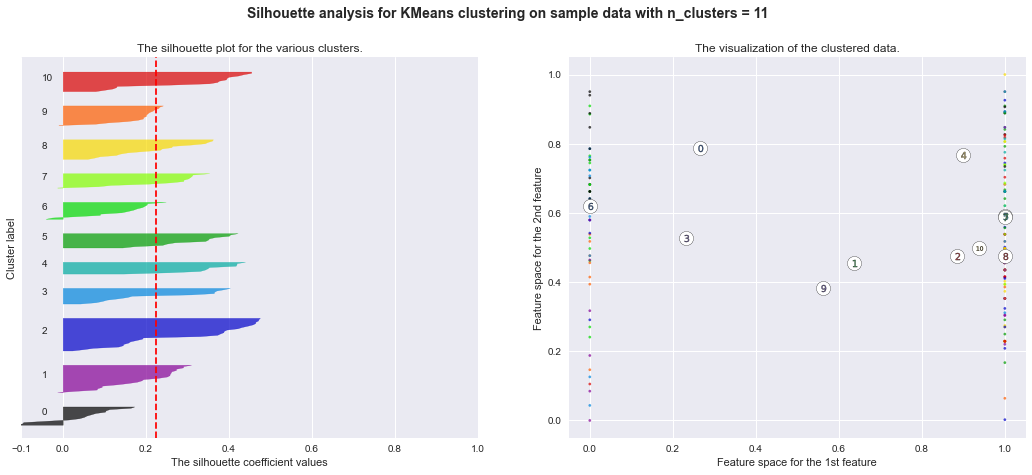

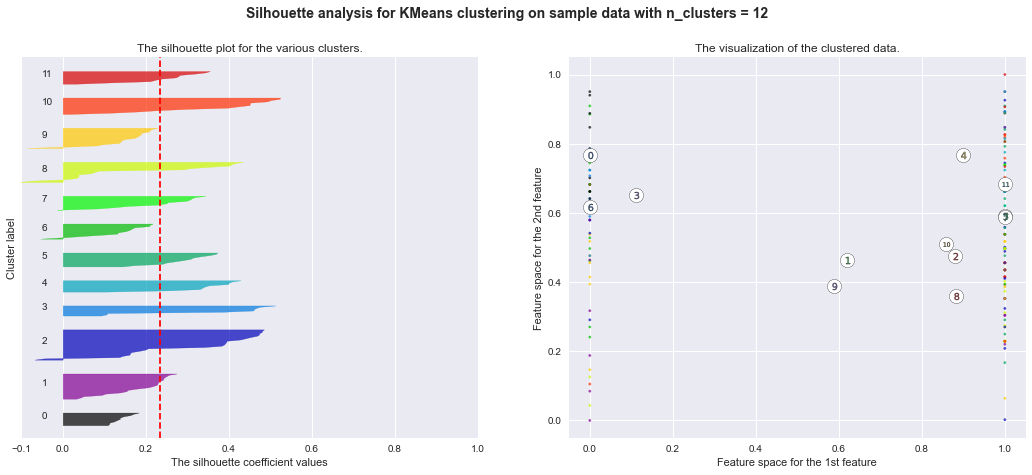

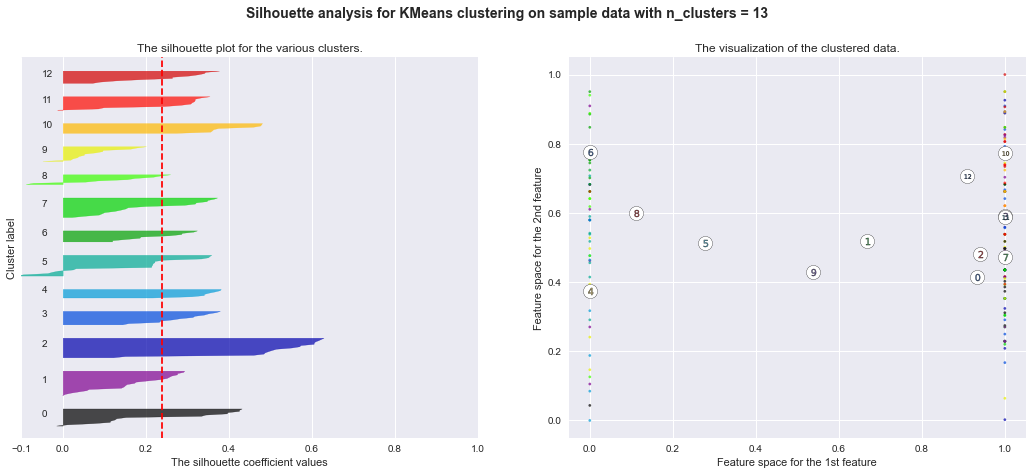

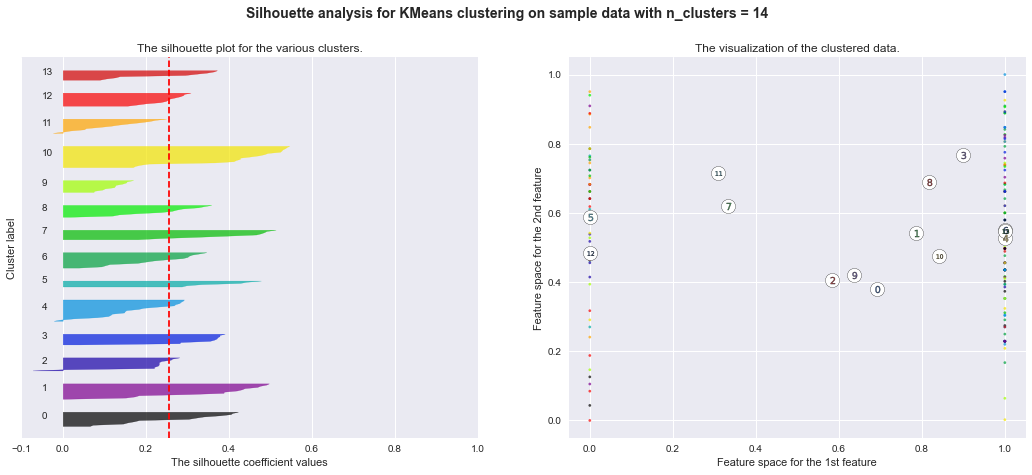

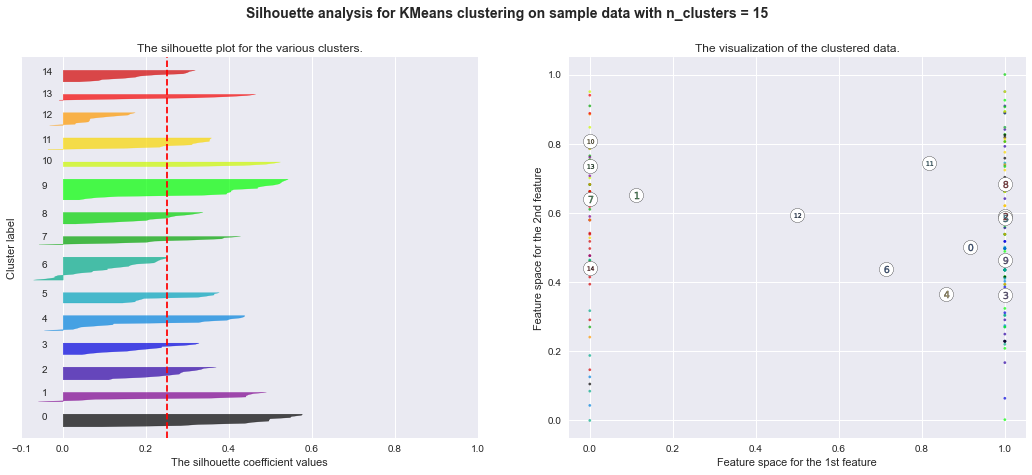

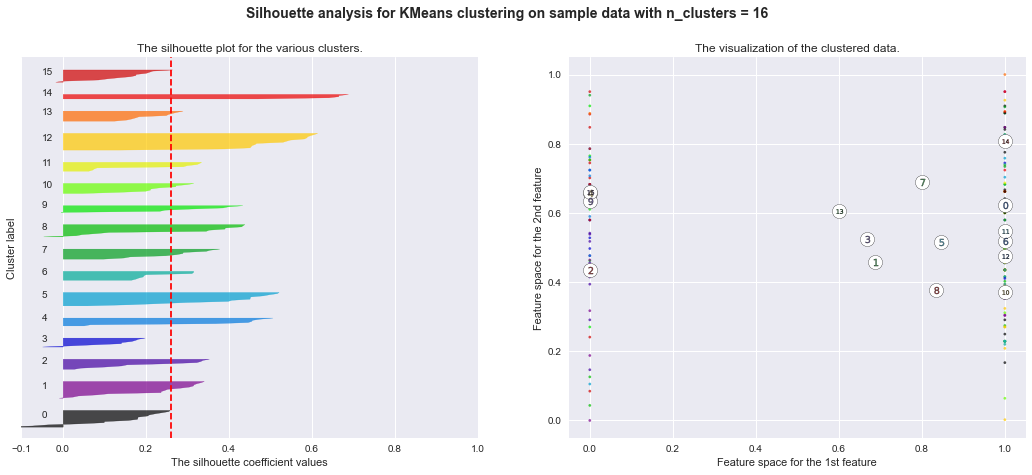

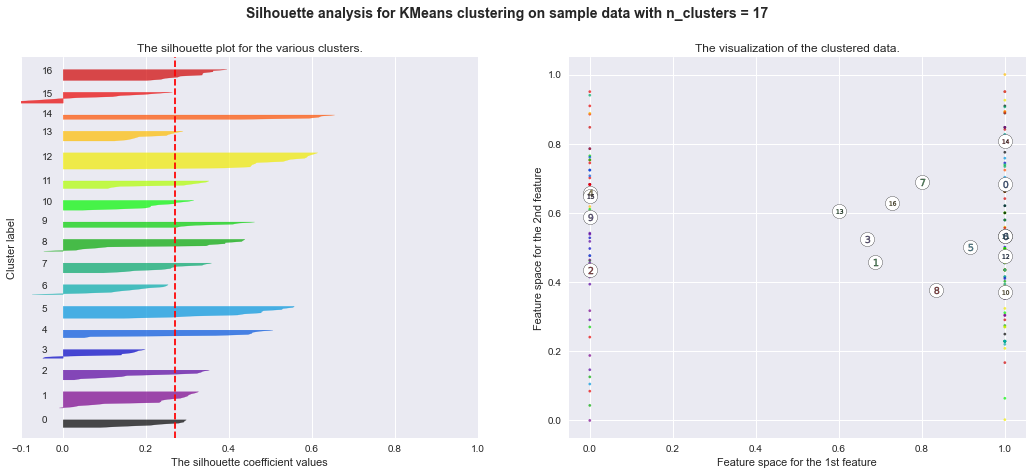

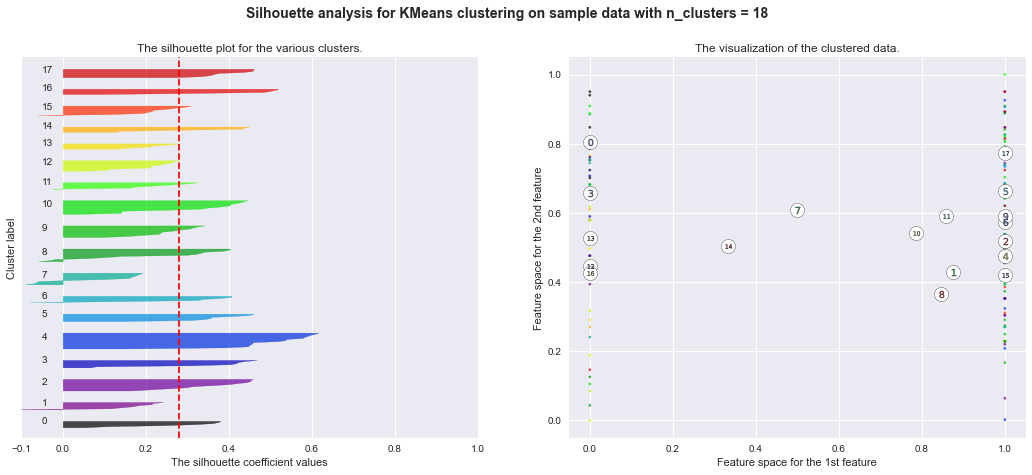

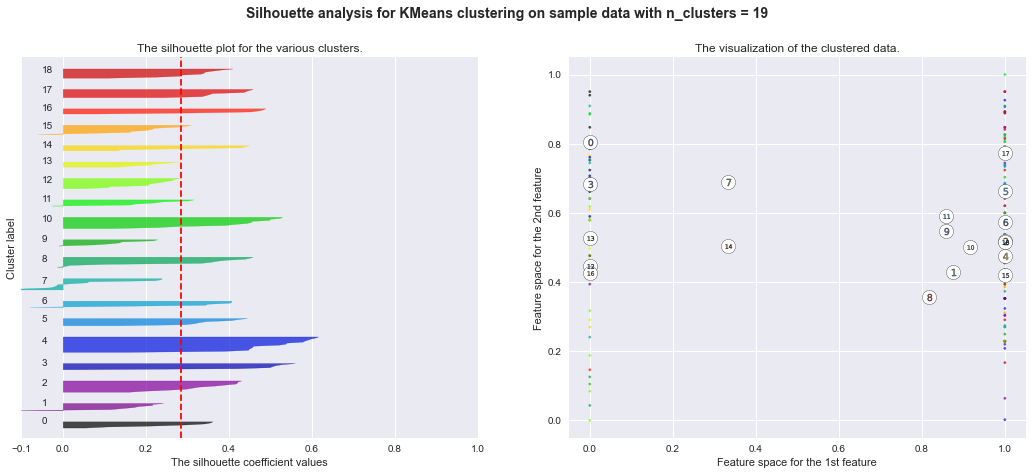

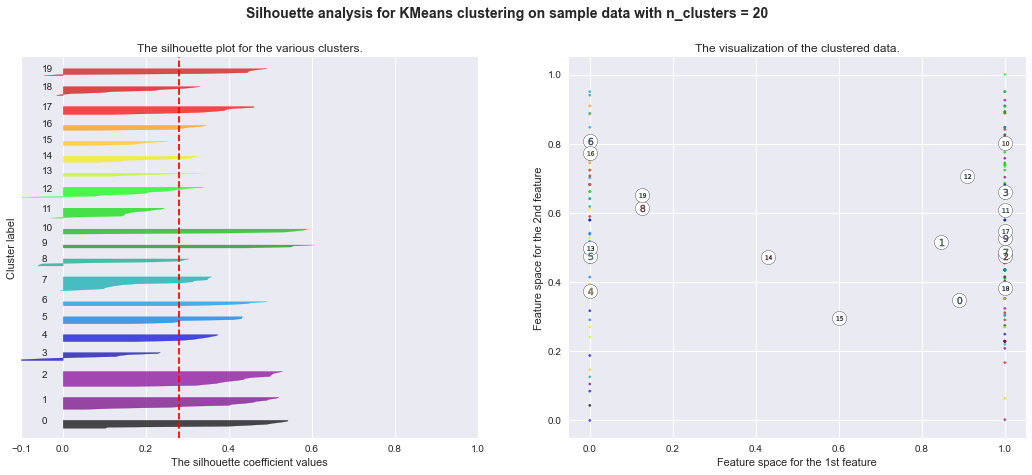

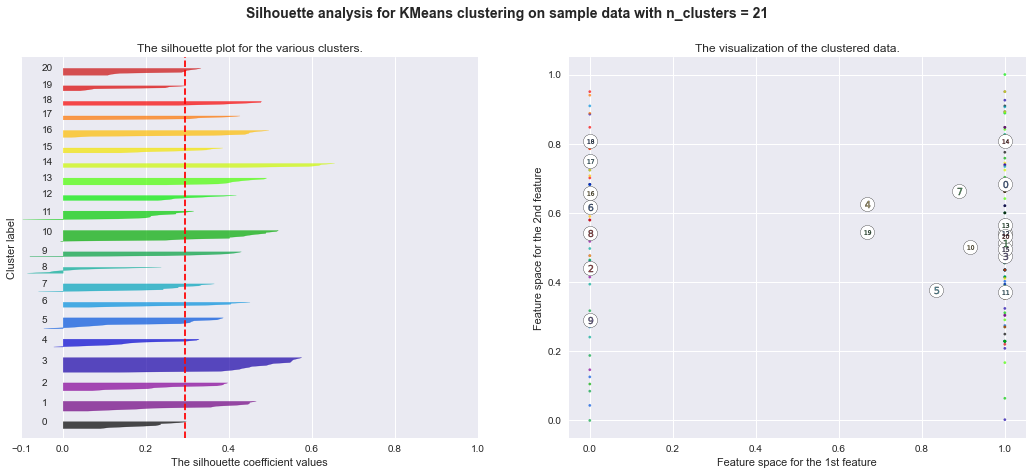

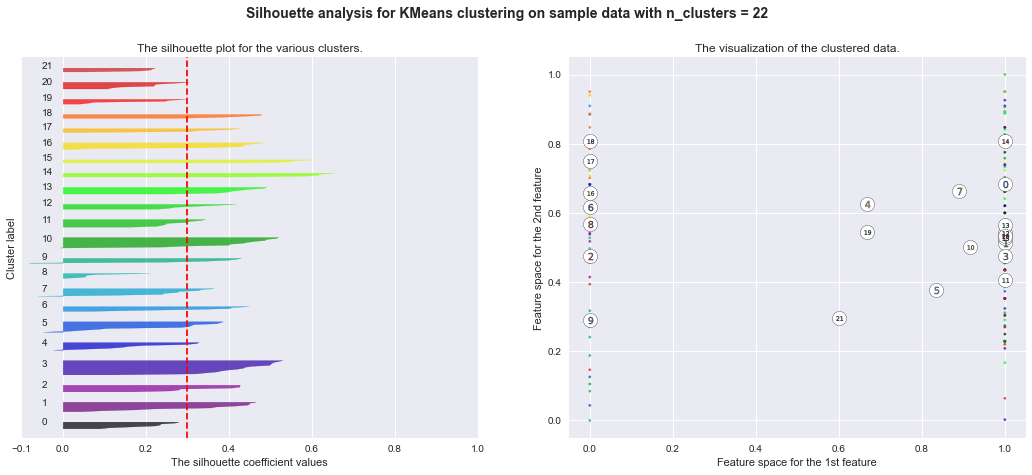

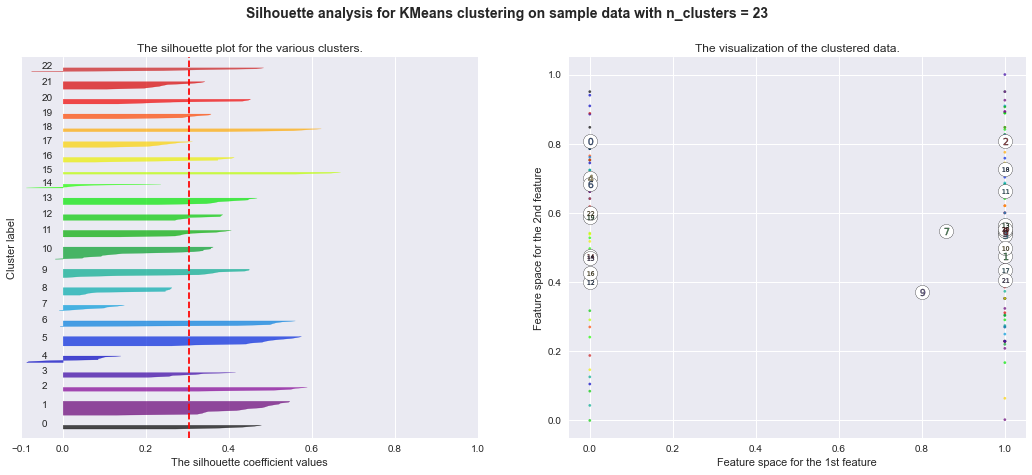

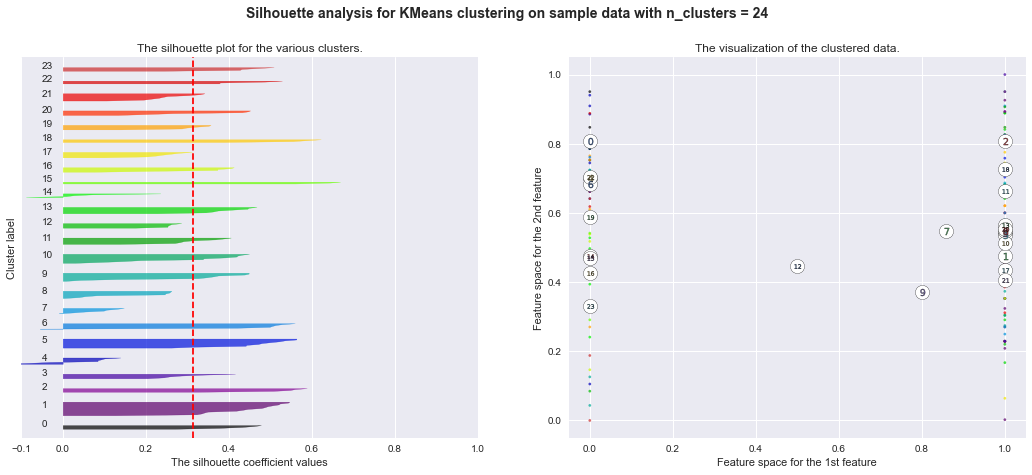

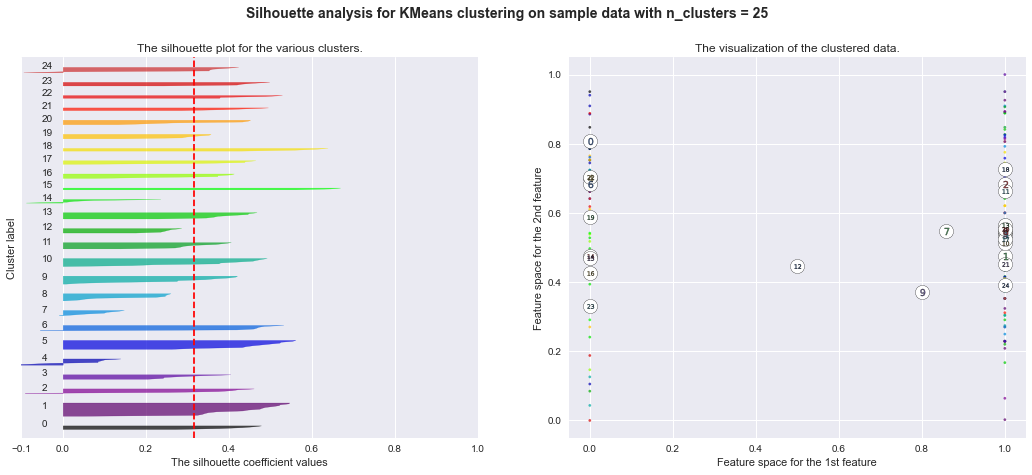

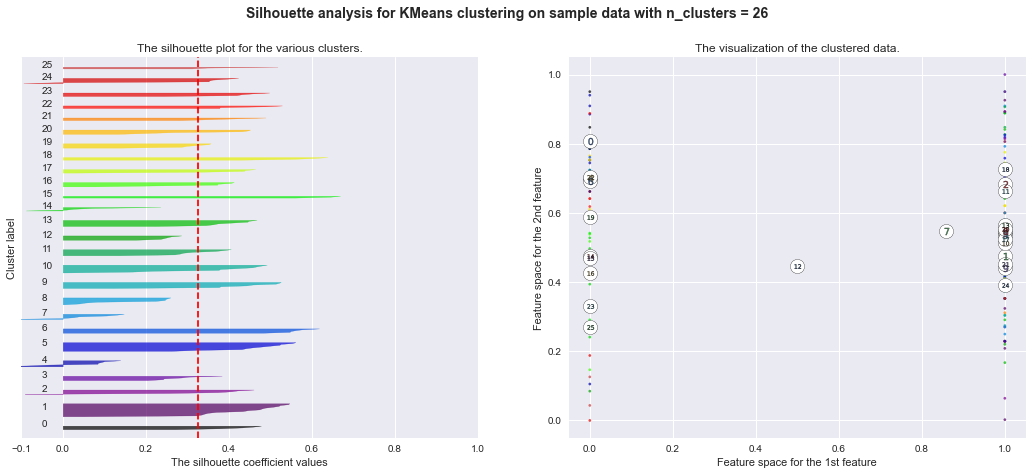

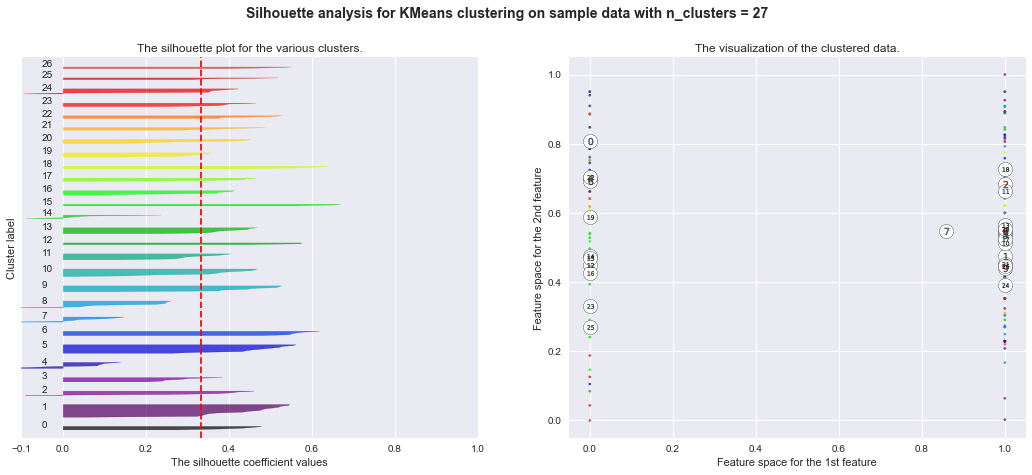

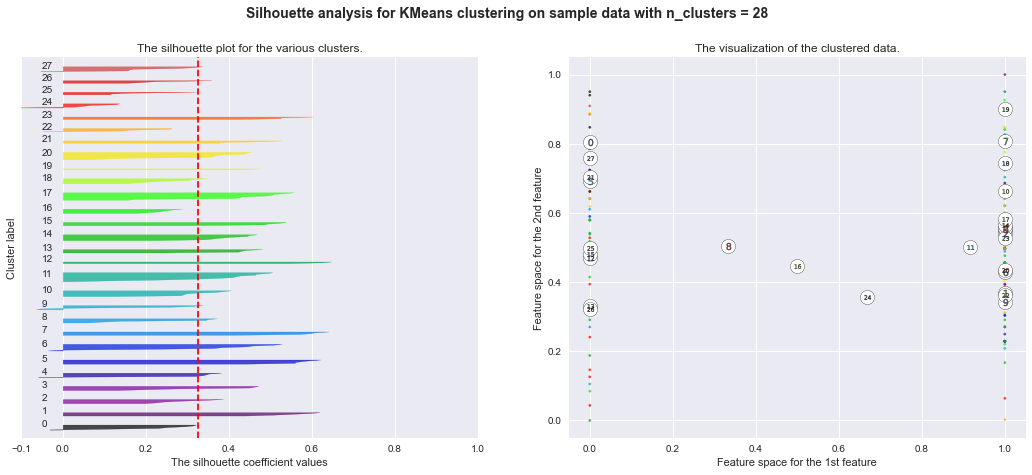

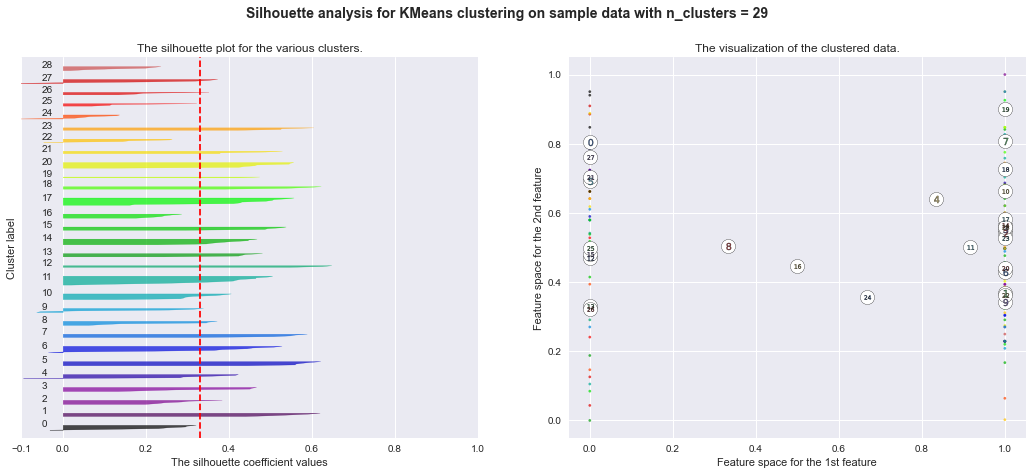

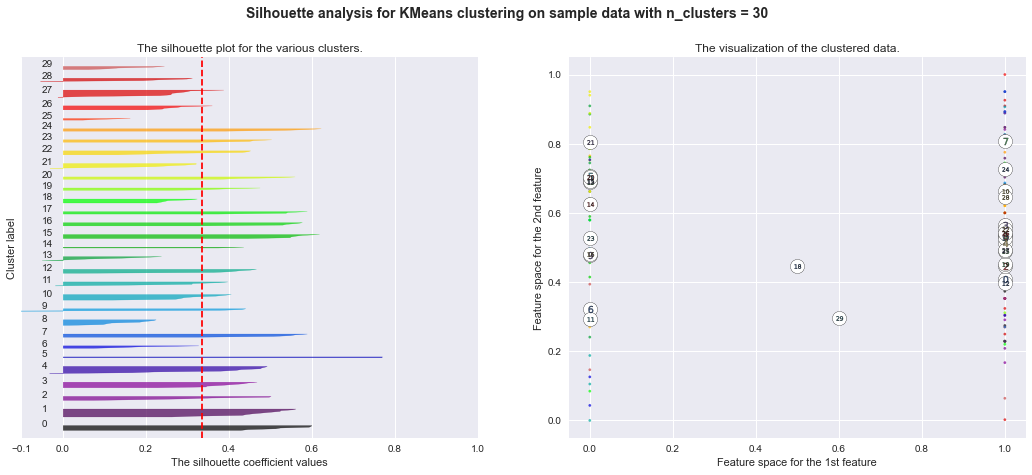

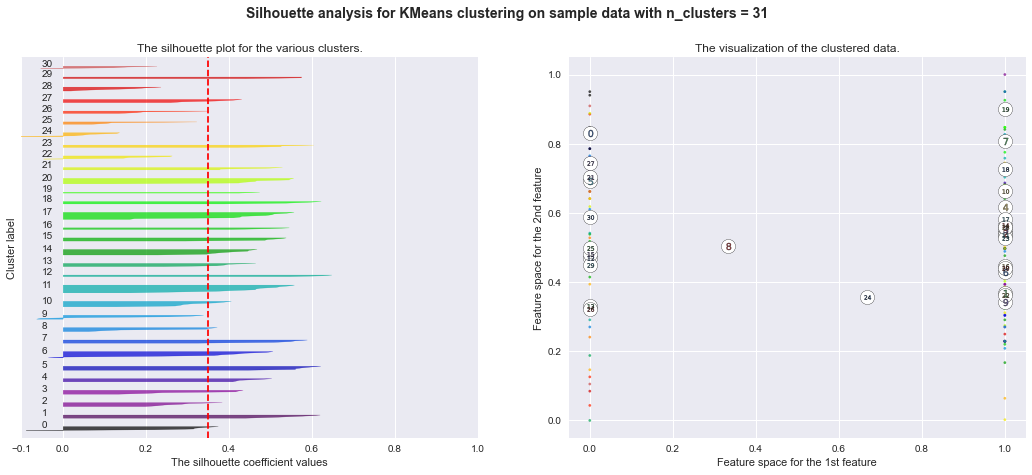

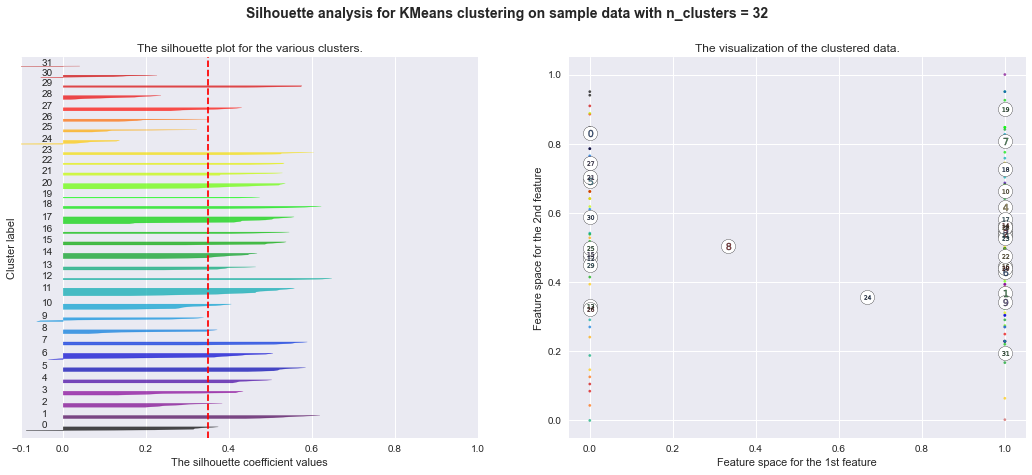

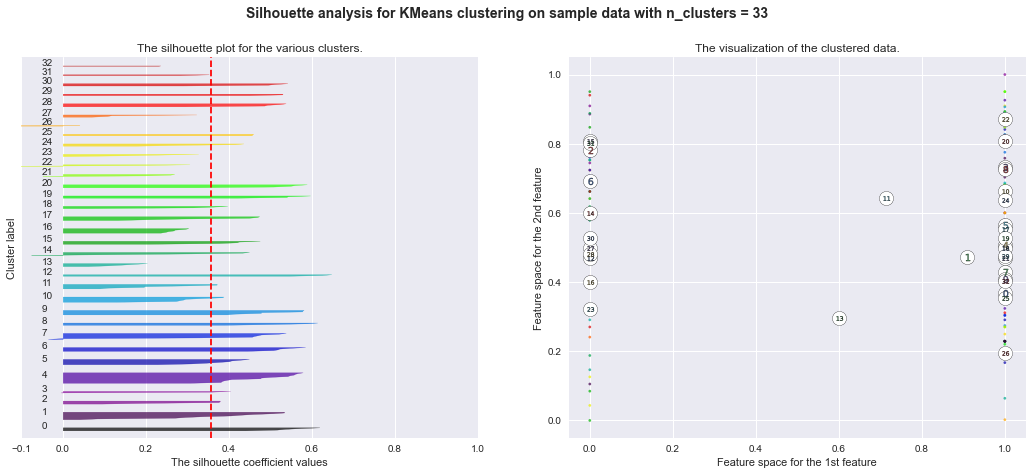

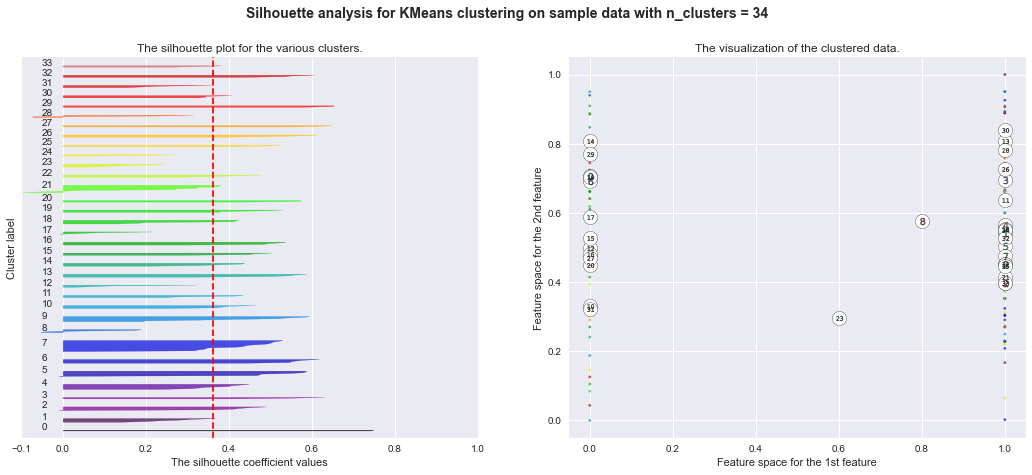

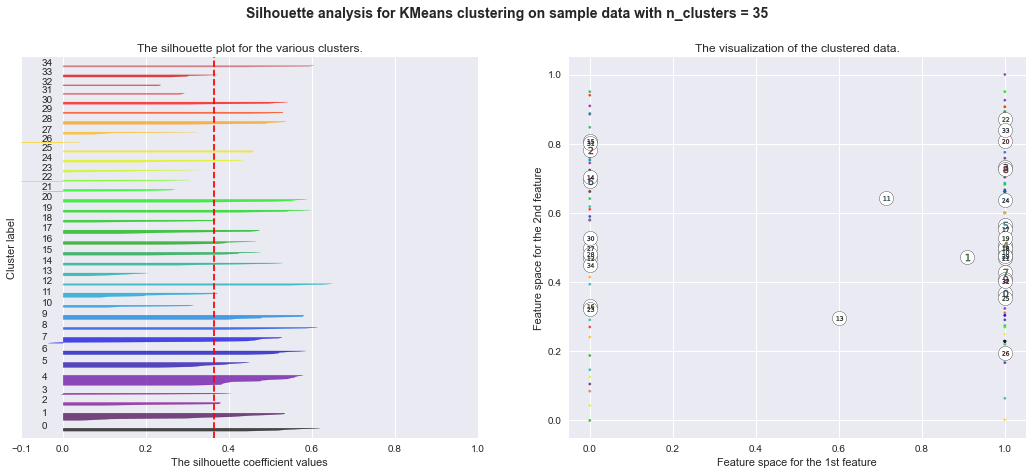

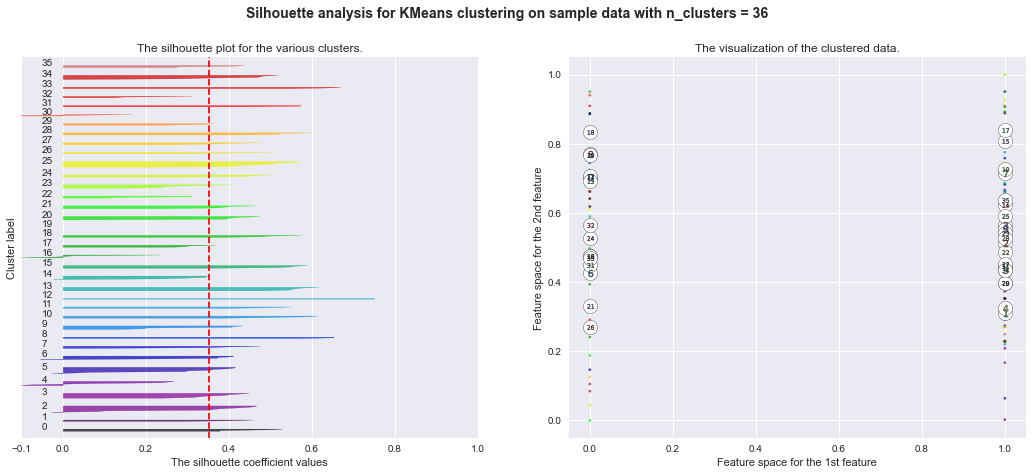

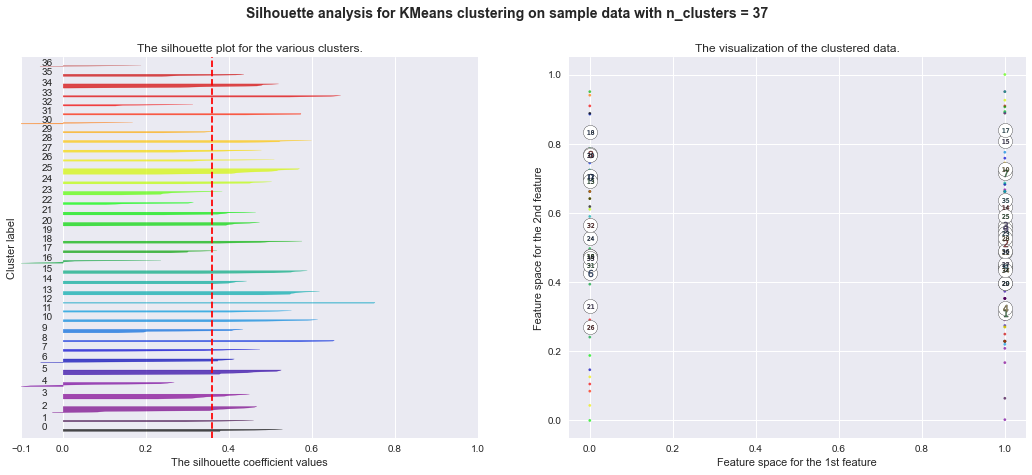

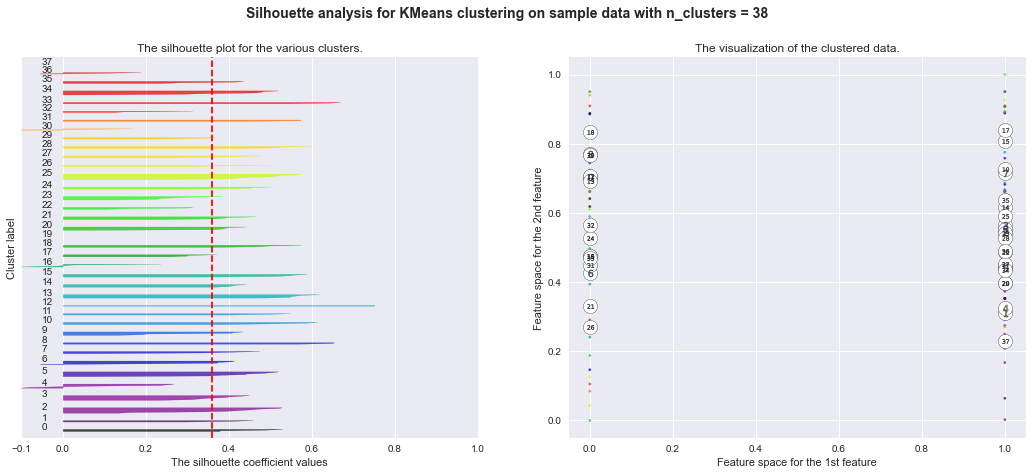

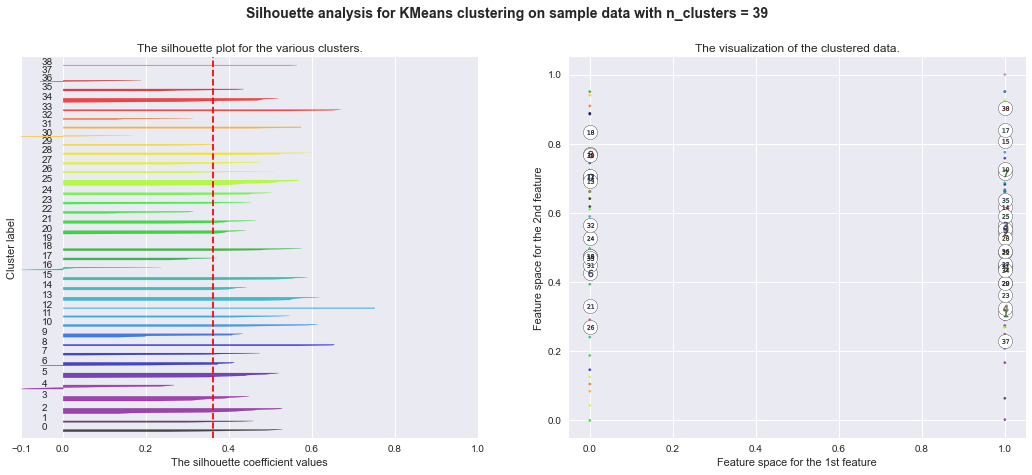

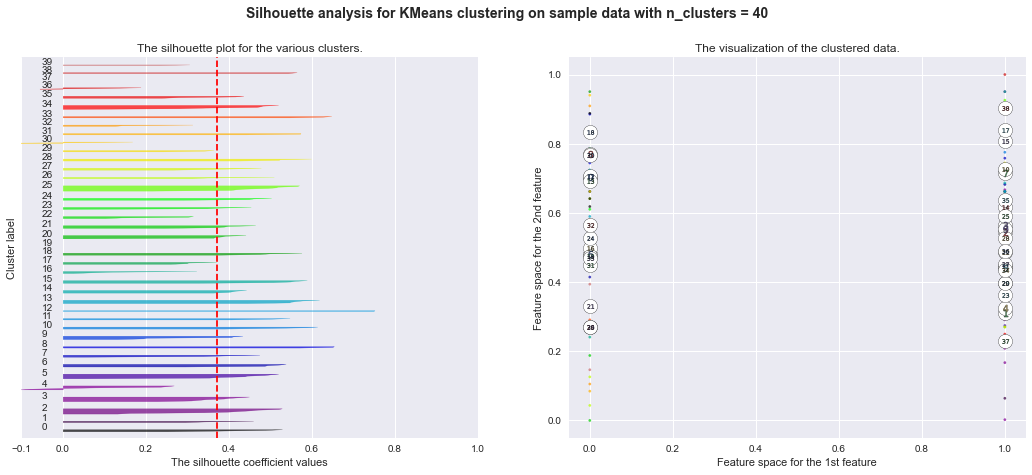

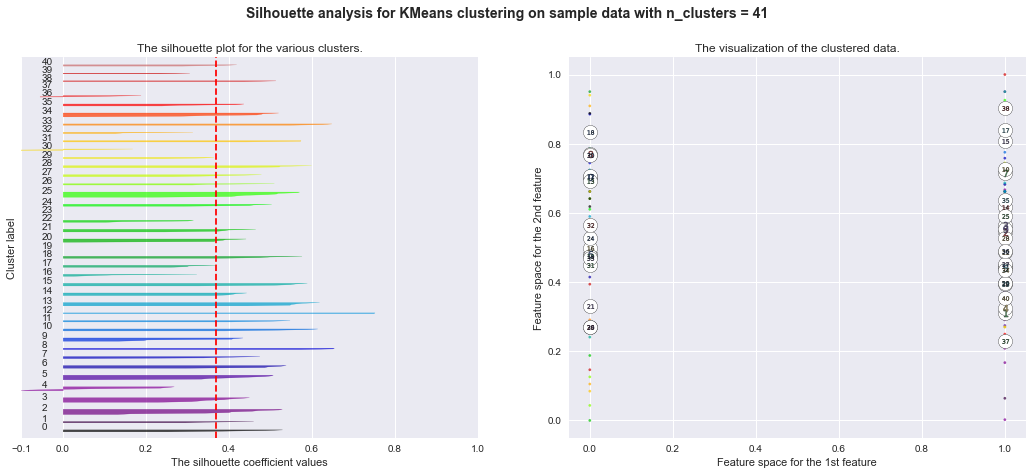

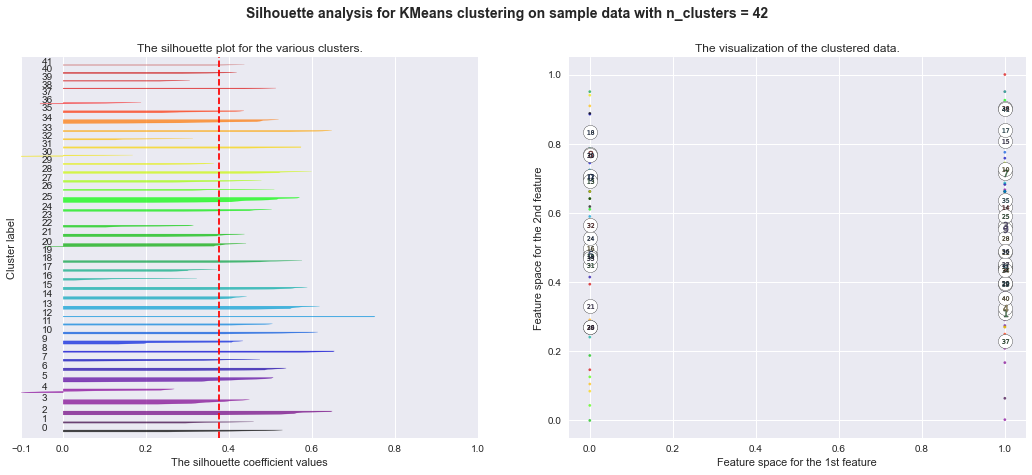

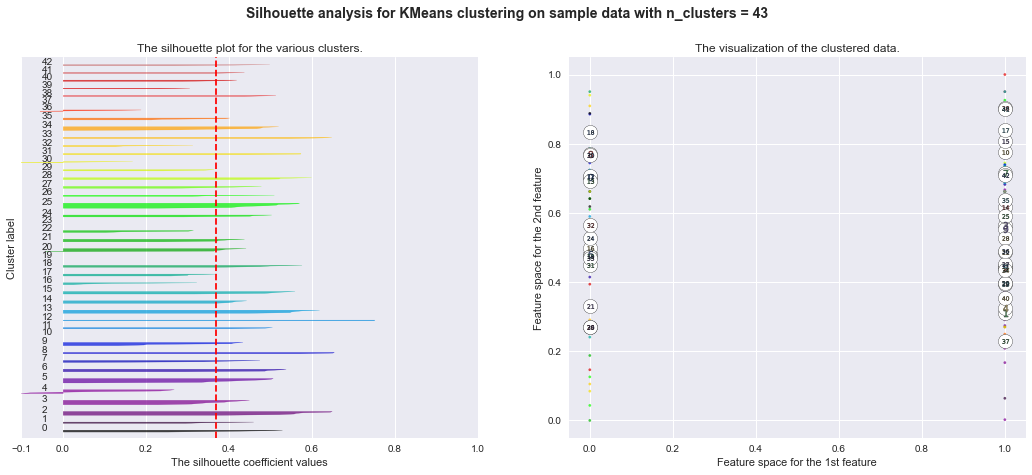

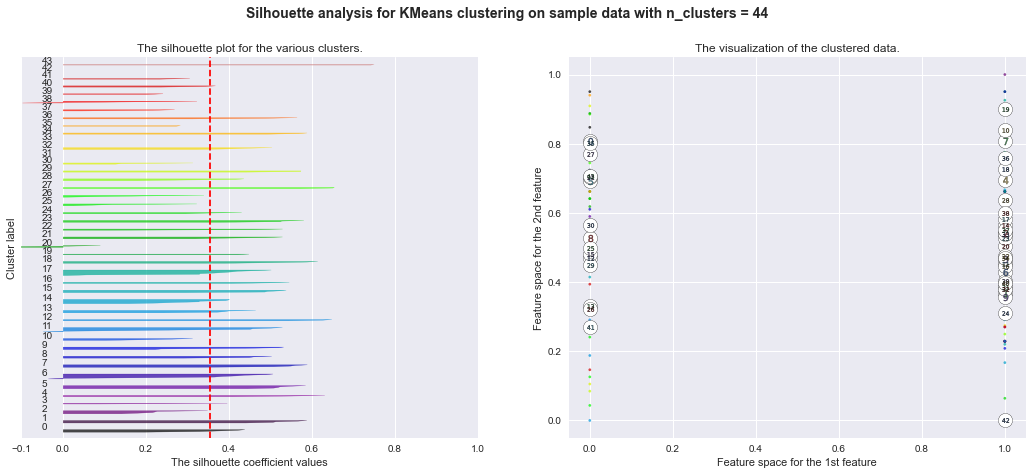

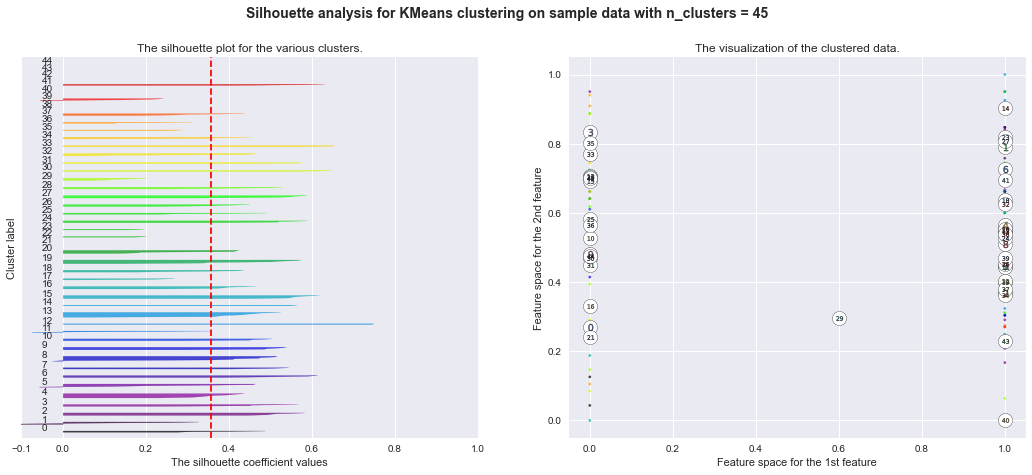

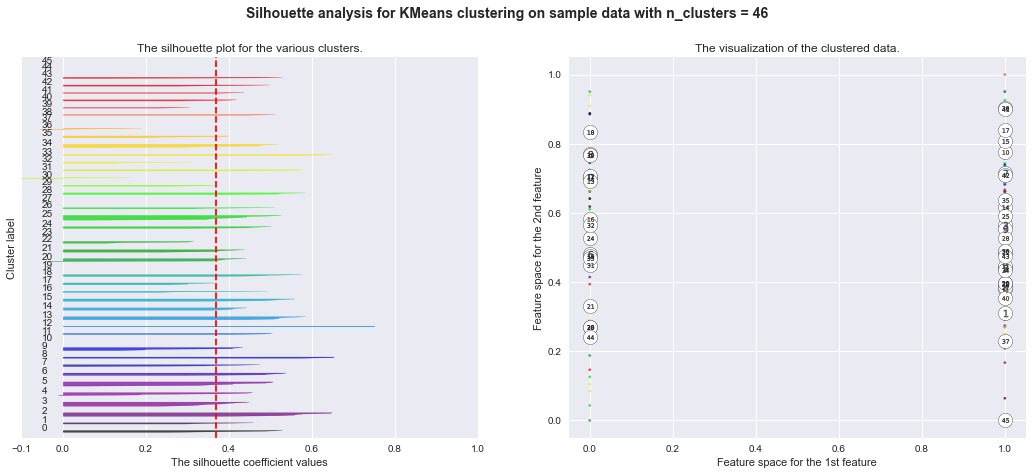

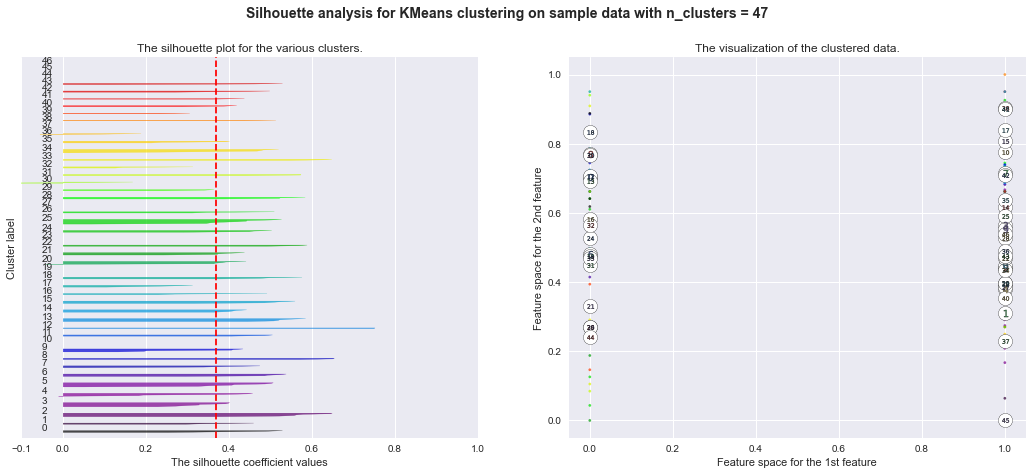

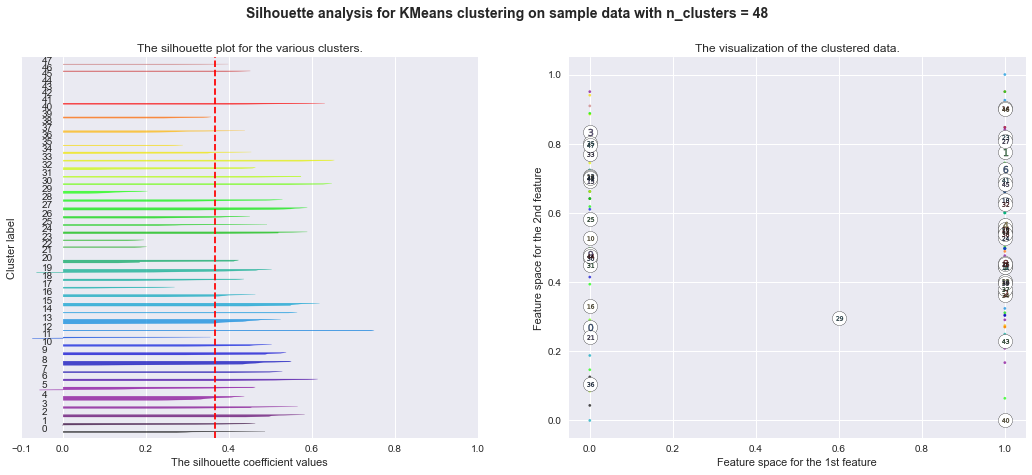

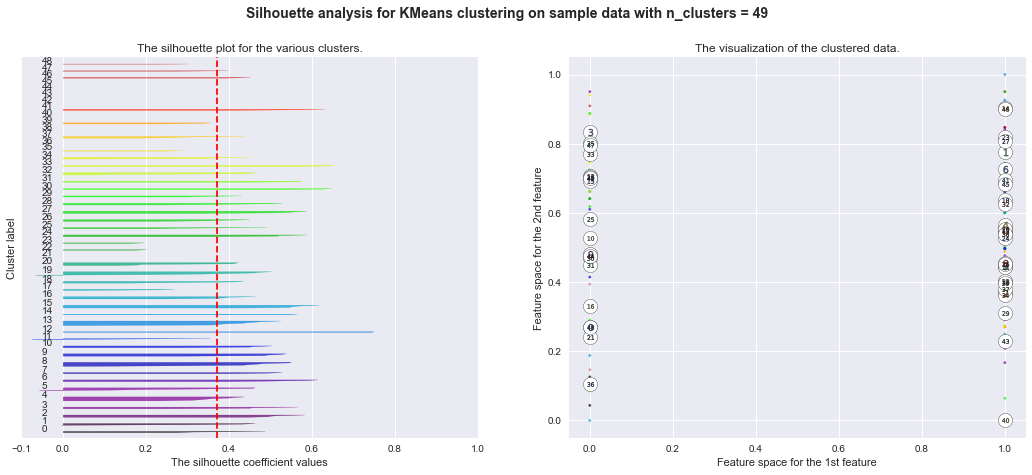

In [96]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = x_train_02.values, y_train_02

range_n_clusters = range(2, 50)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()